In [1]:
import pandas as pd # python에서의 엑셀과 같은 역할
import numpy as np # 계산을 편하게 해 주는 라이브러리
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

import matplotlib.ticker as ticker # 시각화
import matplotlib.dates as mdates # 시각화

import warnings
warnings.filterwarnings('ignore')

# _1. 데이터 불러오기

In [2]:
%%time
df = pd.read_csv('funnel_sample_final.csv')
df_base = df.copy()

CPU times: total: 6.53 s
Wall time: 6.53 s


## 1.1 data spec 확인

In [3]:
df_base.info()
# 데이터가 많은경우 null 값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902435 entries, 0 to 1902434
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   dates                  object 
 1   hours                  int64  
 2   age_layer              object 
 3   se_inflowed            int64  
 4   se_joined              float64
 5   se_cert_pv             float64
 6   se_cert_done           float64
 7   se_tax_calculation     float64
 8   se_tax_check           float64
 9   se_pay_pv              float64
 10  se_is_not_target       float64
 11  se_ref                 float64
 12  se_ref_kt              float64
 13  se_ref_lk              float64
 14  se_additional_info_pv  float64
 15  se_add_done            float64
 16  se_edit_done           float64
 17  se_save_done           float64
 18  et_inflowed            object 
 19  et_joined              object 
 20  et_cert_pv             object 
 21  et_cert_done           object 
 22  et_tax_calculation

In [4]:
df_base.sample(5)

,dates,hours,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,...,et_tax_check,et_pay_pv,et_is_not_target,et_ref,et_ref_kt,et_ref_lk,et_additional_info_pv,et_add_done,et_edit_done,et_save_done
1396784,2021-04-23,22,Unknown,1650719860810,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744682,2021-04-25,7,30s,1650837631024,1.650838e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241156,2021-04-24,0,Unknown,1650729549367,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1418101,2021-04-25,20,Unknown,1650887788844,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539189,2021-04-28,16,Unknown,1651130701655,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# _2. data scheme

| idx | column | desc | type |
| --- | --- | --- | --- |
| 0 | dates | 날짜 | category | 
| 1 | hours | (접속)시각 | category | 
| 2 | age_layer | 연령대 | category | 
| ------ | ------------------------------ | ------------------------------ | ------------------------------ |
| 3 | se_inflowed | session_(첫단계)유입 | 가입_이용 |
| 4 | se_joined | session_가입 |  가입_이용 |
| 5 | se_cert_pv | session_인증(간편인증 page) |  가입_이용 |
| 6 | se_cert_done | session_인증완료 | 가입_이용 |
| 7 | se_tax_calculation | session_세금계산(완료) |  가입_이용 |
| 8 | se_tax_check | session_(계산결과)조회 |  가입_이용 |
| 9 | se_pay_pv | session_결제화면 |  가입_이용 |
| 10 | se_is_not_target | session_서비스_비대상 | 가입 _ 이용 |
| 11 | se_ref | session_친구소개 | 친구소개 |
| 12 | se_ref_kt | session_친구소개_시도_1 | 친구소개 |
| 13 | se_ref_lk | session_친구소개_시도_2 | 친구소개 |
| 14 | se_addition_info_pv | session_추가정보입력안내 | 추가정보입력 |
| 15 | se_add_done | session_추가하기 | 추가정보입력 |
| 16 | se_edit_done | session_수정완료 | 추가정보입력 |
| 17 | se_save_done | session_저장완료 | 추가정보입력 |
| ------ | ------------------------------ | ------------------------------ |------------------------------ |
| 18 | et_inflowed | event_time_유입 | 가입_이용 |
| 19 | et_joined | event_time_가입 | 가입_이용 |
| 20 | et_cert_pv | event_time_인증 | 가입_이용 |
| 21 | et_cert_done | event_time_인증완료 | 가입_이용 |
| 22 | et_tax_calculation | event_time_계산 | 가입_이용 |
| 23 | et_tax_check | event_time_조회 | 가입_이용 |
| 24 | et_pay_pv | event_time_결제화면 | 가입_이용 |
| 25 | et_is_not_target | event_time_서비스_비대상 | 가입_이용 |
| 26 | et_ref | event_time_친구소개 | 친구소개 |
| 27 | et_ref_kt | event_time_친구소개_시도_1 | 친구소개 |
| 28 | et_ref_lk | event_time_친구소개_시도_2 | 친구소개 |
| 29 | et_addition_info_pv | event_time_추가정보입력안내 | 추가정보입력 |
| 30 | et_add_done | event_time_추가하기 | 추가정보입력 |
| 31 | et_edit_done | event_time_수정완료 | 추가정보입력 |
| 32 | et_save_done | event_time_저장완료 | 추가정보입력 


[데이터 소개] 
- 0~2 : 집계 기준으로써 활용될 가능성 높음 
- se, et : 집계 대상으로 활용될 가능성 높음 
    - se : session id 기준으로 적재
    - et : event time 기준으로 적재

[퍼넬 순서] 
- 유입 -> 가입 -> 인증 -> 인증완료 -> 계산 -> 조회 하였을때,
결제 화면(서비스 제공가능)(8 -> 9) or 서비스 비대상(8 -> 10) 으로 나누어짐
- 즉, 3-> 8번까지는 one-way, 그 이후 서비스 제공가능여부에 다라 9번 혹은 10번으로 진행

11~13 : 친구 소개 관련 퍼넬
14 ~ 17 : 환급 공제 더 가능한 경우, 부양가족 추가 정보 요청

In [5]:
#집계기준(0~2)가 아닌, 
#전체 행 모두를 집계를 하고 싶을때, 
#모든행을 기준점으로 삼을 수 있을만한 하나의 컬럼이 필요해서 생성(집계기준)
df_base['basic'] = 1


## 2.1 column 구분해 보기


### 2.1.1 category

In [7]:
# 집계 기준이 되는 컬럼
# 'dates', 'hours', 'age_layer'
# 접속시간에 따라 퍼넬이 달라질 수도있을 것 같아서 hours 을 추가함 !(홈택스 서비스 가능 시간에 따른 사항을 참고하기위해)
# hours = 1인경우 새벽 1시를 의미 : 이때는 홈택스 서비스 가능시간 X 
df_base[['dates', 'hours', 'age_layer']].head()



,dates,hours,age_layer
0,2021-04-29,1,Unknown
1,2021-04-29,4,Unknown
2,2021-04-29,3,Unknown
3,2021-04-28,10,Unknown
4,2021-04-28,21,Unknown


In [8]:
# Python은 0부터 넘버링
df_base.columns[0:2]

Index(['dates', 'hours'], dtype='object')

In [9]:
# 마지막 넘버 + 1로 마무리
df_base.columns[0:2+1]

Index(['dates', 'hours', 'age_layer'], dtype='object')

In [10]:
# tolist() 붙여주는게 더 안전함
category = df_base.columns[0:2+1].tolist()
category

['dates', 'hours', 'age_layer']

In [11]:
# 집계기준 = category
# df_base[['dates', 'hours', 'age_layer']].head()
df_base[category].head()

,dates,hours,age_layer
0,2021-04-29,1,Unknown
1,2021-04-29,4,Unknown
2,2021-04-29,3,Unknown
3,2021-04-28,10,Unknown
4,2021-04-28,21,Unknown


### 2.1.2. 가입( df_signup ) funnel

In [14]:
# 3 ~ 10 퍼넬 단계(가입 -> 결제까지의 단계)

df_base.columns[3:11]

<bound method IndexOpsMixin.tolist of Index(['se_inflowed', 'se_joined', 'se_cert_pv', 'se_cert_done',
       'se_tax_calculation', 'se_tax_check', 'se_pay_pv', 'se_is_not_target'],
      dtype='object')>

In [12]:
signup = df_base.columns[3:11].tolist()
signup

['se_inflowed',
 'se_joined',
 'se_cert_pv',
 'se_cert_done',
 'se_tax_calculation',
 'se_tax_check',
 'se_pay_pv',
 'se_is_not_target']

In [13]:
df_base[signup].head()

,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target
0,1651164079013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1651175470863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1651172275521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1651107651854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1651149494804,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
signup_v1 = category + signup
signup_v1
# list + list = list
## 오른쪽 항목이 새롭게 왼쪽항목으로 선언된다

['dates',
 'hours',
 'age_layer',
 'se_inflowed',
 'se_joined',
 'se_cert_pv',
 'se_cert_done',
 'se_tax_calculation',
 'se_tax_check',
 'se_pay_pv',
 'se_is_not_target']

In [15]:
df_signup = df_base[signup_v1]
df_signup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902435 entries, 0 to 1902434
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   dates               object 
 1   hours               int64  
 2   age_layer           object 
 3   se_inflowed         int64  
 4   se_joined           float64
 5   se_cert_pv          float64
 6   se_cert_done        float64
 7   se_tax_calculation  float64
 8   se_tax_check        float64
 9   se_pay_pv           float64
 10  se_is_not_target    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 159.7+ MB


### 2.1.3. 친구소개( df_ref ) funnel

In [17]:
df_ref_pay = df_base[['dates', 'age_layer', 'se_pay_pv', 'se_ref', 'se_ref_kt', 'se_ref_lk']]
df_ref_pay

## se_pay_pv를 넣은이유? 가설 : 결제 가능한(환급가능한 회원)이 친구 소개(se_pay_pv) or 환급받지 않은 회원이 친구소개 하는 상황이 다를것이라는 조건하에 진행
## 여기서는 환급 가능 회원 + 환급 가능하지 않은 회원 둘다 확인됨

,dates,age_layer,se_pay_pv,se_ref,se_ref_kt,se_ref_lk
0,2021-04-29,Unknown,NaN,NaN,NaN,NaN
1,2021-04-29,Unknown,NaN,NaN,NaN,NaN
2,2021-04-29,Unknown,NaN,NaN,NaN,NaN
3,2021-04-28,Unknown,NaN,NaN,NaN,NaN
4,2021-04-28,Unknown,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1902430,2021-04-23,Unknown,NaN,NaN,NaN,NaN
1902431,2021-04-28,30s,NaN,NaN,NaN,NaN
1902432,2021-04-23,Unknown,NaN,NaN,NaN,NaN
1902433,2021-04-26,Unknown,NaN,NaN,NaN,NaN


1.환급 가능함(결제가 가능한 회원) 을 알게 된 회원(null값이 아닌)것만 확인

In [18]:
# se_pay_pv : 하기 세션id 를 가진회원들은 서비스 이용 가능

df_ref_pay = df_ref_pay[df_ref_pay['se_pay_pv'].notnull()]
df_ref_pay

,dates,age_layer,se_pay_pv,se_ref,se_ref_kt,se_ref_lk
2392,2021-04-25,40s,1.650849e+12,NaN,NaN,NaN
4586,2021-04-23,50s,1.650713e+12,NaN,NaN,NaN
9742,2021-04-24,40s,1.650771e+12,NaN,NaN,NaN
10543,2021-04-25,50s,1.650891e+12,NaN,NaN,NaN
11698,2021-04-28,40s,1.651144e+12,NaN,NaN,NaN
...,...,...,...,...,...,...
1902242,2021-04-24,40s,1.650785e+12,NaN,NaN,NaN
1902311,2021-04-26,40s,1.650934e+12,NaN,NaN,NaN
1902326,2021-04-24,50s,1.650785e+12,NaN,NaN,NaN
1902376,2021-04-28,50s,1.651121e+12,NaN,NaN,NaN


2. 환급이 가능하지 않은 회원들만 확인

In [19]:
# se_is_not_target
df_ref_none = df_base[['dates', 'age_layer', 'se_is_not_target', 'se_ref', 'se_ref_kt', 'se_ref_lk']]

In [20]:
# se_is_not_target :하기 세션id 를 가진회원들은 서비스 이용 불가능
df_ref_none = df_ref_none[df_ref_none['se_is_not_target'].notnull()]
df_ref_none

,dates,age_layer,se_is_not_target,se_ref,se_ref_kt,se_ref_lk
863,2021-04-23,40s,1.650707e+12,NaN,NaN,NaN
993,2021-04-26,20s,1.650973e+12,NaN,NaN,NaN
1552,2021-04-26,40s,1.650948e+12,NaN,NaN,NaN
2362,2021-04-28,30s,1.651121e+12,NaN,NaN,NaN
3138,2021-04-28,30s,1.651117e+12,NaN,NaN,NaN
...,...,...,...,...,...,...
1902407,2021-04-26,40s,1.650970e+12,NaN,NaN,NaN
1902410,2021-04-24,50s,1.650770e+12,NaN,NaN,NaN
1902415,2021-04-23,30s,1.650682e+12,NaN,NaN,NaN
1902419,2021-04-26,20s,1.650953e+12,NaN,NaN,NaN


### 3 가지 데이터 프레임 생성
- df_signup : 가입부터 -> 결제 가능 여부 인지 funnel df
- df_ref_pay : 결제 가능함 인지함을 회원의 친구소개 funnel df
- df_ref_none : 결제 불가능함을 인지한 회원의 친구소개 funnel df

# _3. 전환율

## 3.1. 가입 전환율

### 3.1.1 데이터 준비

In [21]:
df_signup.sample(5) # sample 메소드는 실행 할때마다 달라짐

,dates,hours,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target
1672675,2021-04-26,6,Unknown,1650922792993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1510790,2021-04-25,16,Unknown,1650872837852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058121,2021-04-26,21,Unknown,1650975881363,1.650976e+12,1.650976e+12,NaN,NaN,NaN,NaN,NaN
648156,2021-04-24,20,Unknown,1650798446346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272900,2021-04-25,8,Unknown,1650843253013,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_signup['basic'] = 1
df_signup.head()

# basic 사용 이유? (date or hours or age 에 따르지 않고) 전체 데이터가 어떻게 구성되어 있는지  알고 싶어서 -> 이후 groupby로 확인 가능 !

,dates,hours,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target,basic
0,2021-04-29,1,Unknown,1651164079013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2021-04-29,4,Unknown,1651175470863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2021-04-29,3,Unknown,1651172275521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2021-04-28,10,Unknown,1651107651854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2021-04-28,21,Unknown,1651149494804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [23]:
%%time
#df_base.groupby(['basic'])['se_inflowed', 'se_joined', 'se_cert_pv', 'se_cert_done', 'se_tax_calculation', 'se_tax_check', 'se_pay_pv', 'se_is_not_target'].agg('nunique').reset_index()
df_base.groupby(['basic'])[signup].agg('nunique').reset_index()

CPU times: total: 1.73 s
Wall time: 1.76 s


,basic,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target
0,1,1899715,598172,304479,180434,148759,144110,34086,39573


In [24]:
# 시각화할때, 컬럼화해서 보는게 좋음 ! -> 행,열 위치 변환: .T (transpose)

#df_signup_raw = df_signup.groupby(['basic'])[df_signup.columns[2:-1]].agg('nunique').T.reset_index().rename(columns = {'index':'step', 1:'cnts'})
df_signup_raw = df_base.groupby(['basic'])[signup].agg('nunique').T.reset_index()\
                                                                .rename(columns = {'index': 'step', 1: 'unique_cnt'})
df_signup_raw

## wndrksdp \(역슬래시)해주면, 연결된 코드로 인식함 !

basic,step,unique_cnt
0,se_inflowed,1899715
1,se_joined,598172
2,se_cert_pv,304479
3,se_cert_done,180434
4,se_tax_calculation,148759
5,se_tax_check,144110
6,se_pay_pv,34086
7,se_is_not_target,39573


[참고] groupby 없이 해보기(basic 없이)

In [25]:
# df_signup.columns.tolist() # date ~ basic 변수
# df_signup.columns[3:-1].tolist() : se_inflowed ~ sse_is_not_target 까지만 가져오기

['dates',
 'hours',
 'age_layer',
 'se_inflowed',
 'se_joined',
 'se_cert_pv',
 'se_cert_done',
 'se_tax_calculation',
 'se_tax_check',
 'se_pay_pv',
 'se_is_not_target',
 'basic']

In [26]:
# temp_columns = df_signup.columns[3:-1].tolist()
# temp_columns

In [27]:
# len(temp_columns)

In [28]:
## basic = 1 없이 만드는 방법
# cnts = []

# for temp_col in temp_columns:
#     temp_cnts = df_signup[temp_col].nunique()
#     cnts.append(temp_cnts)

# df_list = []
# df_list.append(temp_columns)
# df_list.append(cnts)

# grouped_df = pd.DataFrame(data = df_list, index = ['step', 'cnts']).T

# grouped_df

In [29]:
df_signup_raw

basic,step,unique_cnt
0,se_inflowed,1899715
1,se_joined,598172
2,se_cert_pv,304479
3,se_cert_done,180434
4,se_tax_calculation,148759
5,se_tax_check,144110
6,se_pay_pv,34086
7,se_is_not_target,39573


### 3.1.2. total 가입 전환율

- 그래프 볼때에는 , 
1. x축, y축 보기
2.같은 변동 폭에 있는지

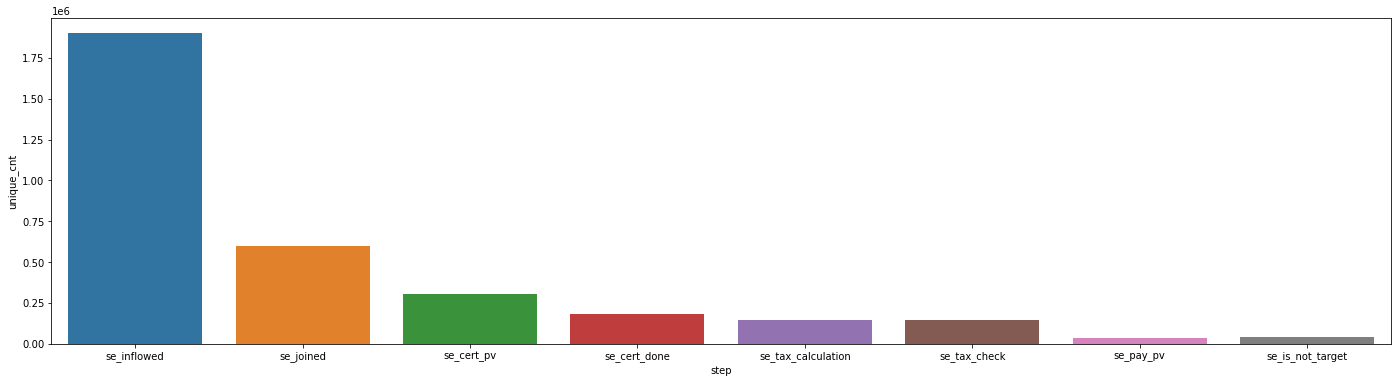

CPU times: total: 391 ms
Wall time: 379 ms


In [34]:
%%time

# 이벤트 개수로 그려보기

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = df_signup_raw,
    x = 'step',
    y = 'unique_cnt',
)

plt.show()

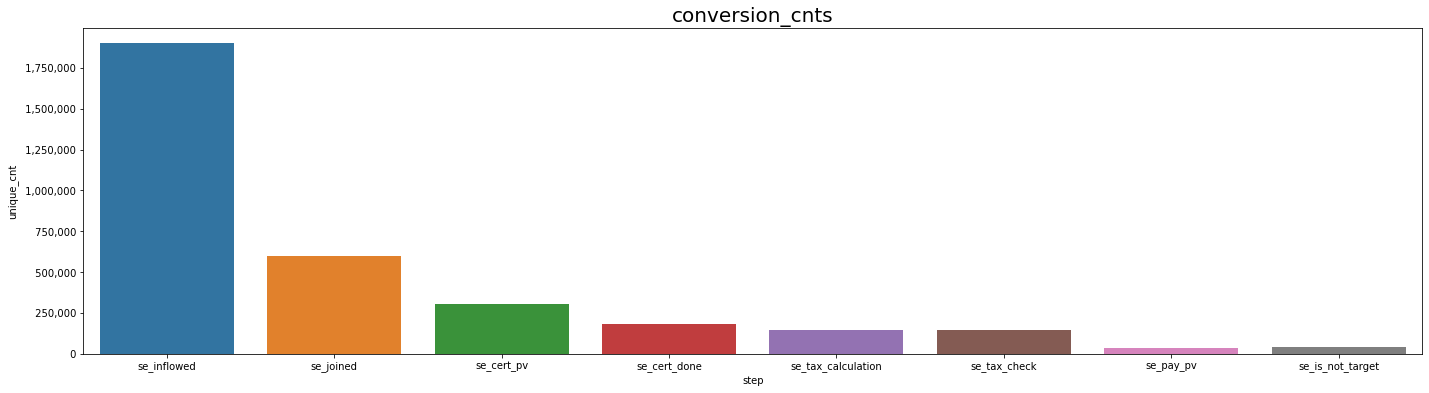

In [37]:
# 보기 좋게 y축 서식 추가하기

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = df_signup_raw,
    x = 'step',
    y = 'unique_cnt',
)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))
# y축 숫자 그대로 출력 ! (ticker 라이브러리 활용)
plt.title(f'conversion_cnts', fontsize = 20)

plt.show()

In [39]:
# 누적 전환율 계산방법 1) 
# 분모 컬럼 생성 
# 가장 단순한 방법: 1899715를 복사하여 컬럼을 생성해 주기
df_signup_raw['first_value_1'] = 1899715
df_signup_raw

basic,step,unique_cnt,first_value_1
0,se_inflowed,1899715,1899715
1,se_joined,598172,1899715
2,se_cert_pv,304479,1899715
3,se_cert_done,180434,1899715
4,se_tax_calculation,148759,1899715
5,se_tax_check,144110,1899715
6,se_pay_pv,34086,1899715
7,se_is_not_target,39573,1899715


In [40]:
df_signup_raw['stacked_conversion_1'] = df_signup_raw['unique_cnt']/df_signup_raw['first_value_1']
df_signup_raw

basic,step,unique_cnt,first_value_1,stacked_conversion_1
0,se_inflowed,1899715,1899715,1.000000
1,se_joined,598172,1899715,0.314875
2,se_cert_pv,304479,1899715,0.160276
3,se_cert_done,180434,1899715,0.094980
4,se_tax_calculation,148759,1899715,0.078306
5,se_tax_check,144110,1899715,0.075859
6,se_pay_pv,34086,1899715,0.017943
7,se_is_not_target,39573,1899715,0.020831


In [46]:
# 누적 전환율 계산방법 2) 
# 분모 컬럼 생성 
# event log 집계 수 중, 가장 큰 값으로
# 누적 전환율이기에 분모로 들어갈 수는 당연히 가장 큰 수 일것이라는 ( 합리적인 ) 기대 
# == 전환율은 1을 넘어갈 수 없을 것이라는 기대
# 가장 추천 방법
df_signup_raw['basic'] = 1
df_signup_raw['first_value_2'] = df_signup_raw.groupby(['basic'])['unique_cnt'].transform('max')

In [48]:
#groupby 결과를 컬럼을 생성할때 transform 사용
df_signup_raw.groupby(['basic'])['unique_cnt'].agg('max') # 하나의 값(스칼라) 반환
df_signup_raw.groupby(['basic'])['unique_cnt'].transform('max') #컬럼 전체의 값 반환

0    1899715
1    1899715
2    1899715
3    1899715
4    1899715
5    1899715
6    1899715
7    1899715
Name: unique_cnt, dtype: int64

In [42]:
df_signup_raw

basic,step,unique_cnt,first_value_1,stacked_conversion_1,basic,first_value_2
0,se_inflowed,1899715,1899715,1.000000,1,1899715
1,se_joined,598172,1899715,0.314875,1,1899715
2,se_cert_pv,304479,1899715,0.160276,1,1899715
3,se_cert_done,180434,1899715,0.094980,1,1899715
4,se_tax_calculation,148759,1899715,0.078306,1,1899715
5,se_tax_check,144110,1899715,0.075859,1,1899715
6,se_pay_pv,34086,1899715,0.017943,1,1899715
7,se_is_not_target,39573,1899715,0.020831,1,1899715


In [49]:
# 누적 전환율 계산방법 3) 
# 분모 컬럼 생성 
# 3. 위치로 찾기: 행렬 원소 위치처럼( 0, 0 )에서 시작
temp_value = df_signup_raw.iloc[0, 1] # unique_cnt = [0,1] 위치
temp_value

1899715

In [50]:
first_value = df_signup_raw.iloc[0, 1]
df_signup_raw['first_value_3'] = first_value
df_signup_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   step                  8 non-null      object 
 1   unique_cnt            8 non-null      int64  
 2   first_value_1         8 non-null      int64  
 3   stacked_conversion_1  8 non-null      float64
 4   basic                 8 non-null      int64  
 5   first_value_2         8 non-null      int64  
 6   first_value_3         8 non-null      int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 576.0+ bytes


In [51]:
df_signup_raw

basic,step,unique_cnt,first_value_1,stacked_conversion_1,basic,first_value_2,first_value_3
0,se_inflowed,1899715,1899715,1.000000,1,1899715,1899715
1,se_joined,598172,1899715,0.314875,1,1899715,1899715
2,se_cert_pv,304479,1899715,0.160276,1,1899715,1899715
3,se_cert_done,180434,1899715,0.094980,1,1899715,1899715
4,se_tax_calculation,148759,1899715,0.078306,1,1899715,1899715
5,se_tax_check,144110,1899715,0.075859,1,1899715,1899715
6,se_pay_pv,34086,1899715,0.017943,1,1899715,1899715
7,se_is_not_target,39573,1899715,0.020831,1,1899715,1899715


In [ ]:
# 누적전환율 시각화

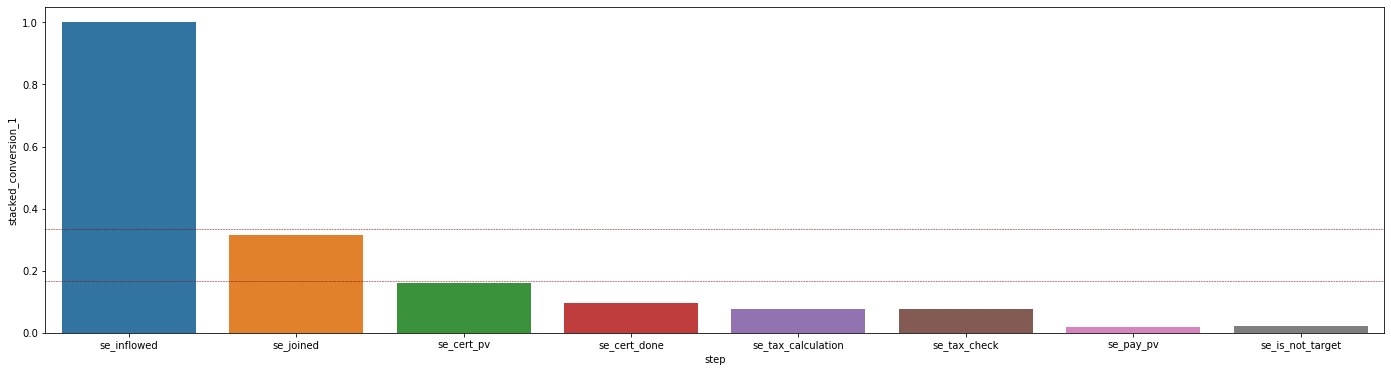

CPU times: total: 93.8 ms
Wall time: 97 ms


In [64]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = df_signup_raw,
    x = 'step',
    y = 'stacked_conversion_1',
)


plt.axhline(1/3, color ='darkred', linestyle = '--', linewidth = 0.5)
plt.axhline((1/3)*(1/2), color ='darkred', linestyle = '--', linewidth = 0.5)

plt.show()



In [ ]:
# 직전 전환율 계산

In [52]:
%%time
df_signup_raw['previous_step'] = df_signup_raw['unique_cnt'].shift(1)
#shift 함수 : (1)씩 밀어내기
df_signup_raw[['step','unique_cnt', 'stacked_conversion_1', 'first_value_1','previous_step']]
#필요한 컬럼만 선택

CPU times: total: 0 ns
Wall time: 2 ms


basic,step,unique_cnt,stacked_conversion_1,first_value_1,previous_step
0,se_inflowed,1899715,1.000000,1899715,NaN
1,se_joined,598172,0.314875,1899715,1899715.0
2,se_cert_pv,304479,0.160276,1899715,598172.0
3,se_cert_done,180434,0.094980,1899715,304479.0
4,se_tax_calculation,148759,0.078306,1899715,180434.0
5,se_tax_check,144110,0.075859,1899715,148759.0
6,se_pay_pv,34086,0.017943,1899715,144110.0
7,se_is_not_target,39573,0.020831,1899715,34086.0


In [53]:
df_signup_raw

basic,step,unique_cnt,first_value_1,stacked_conversion_1,basic,first_value_2,first_value_3,previous_step
0,se_inflowed,1899715,1899715,1.000000,1,1899715,1899715,NaN
1,se_joined,598172,1899715,0.314875,1,1899715,1899715,1899715.0
2,se_cert_pv,304479,1899715,0.160276,1,1899715,1899715,598172.0
3,se_cert_done,180434,1899715,0.094980,1,1899715,1899715,304479.0
4,se_tax_calculation,148759,1899715,0.078306,1,1899715,1899715,180434.0
5,se_tax_check,144110,1899715,0.075859,1,1899715,1899715,148759.0
6,se_pay_pv,34086,1899715,0.017943,1,1899715,1899715,144110.0
7,se_is_not_target,39573,1899715,0.020831,1,1899715,1899715,34086.0


In [55]:
df_signup_raw['previous_conversion'] = df_signup_raw['unique_cnt']/df_signup_raw['previous_step']
df_signup_raw

basic,step,unique_cnt,stacked_conversion_1,basic,previous_step,previous_conversion
0,se_inflowed,1899715,1.000000,1,NaN,NaN
1,se_joined,598172,0.314875,1,1899715.0,0.314875
2,se_cert_pv,304479,0.160276,1,598172.0,0.509016
3,se_cert_done,180434,0.094980,1,304479.0,0.592599
4,se_tax_calculation,148759,0.078306,1,180434.0,0.824451
5,se_tax_check,144110,0.075859,1,148759.0,0.968748
6,se_pay_pv,34086,0.017943,1,144110.0,0.236528
7,se_is_not_target,39573,0.020831,1,34086.0,1.160975


In [54]:
df_signup_raw.drop(['first_value_1', 'first_value_2', 'first_value_3'], axis = 1, inplace = True)

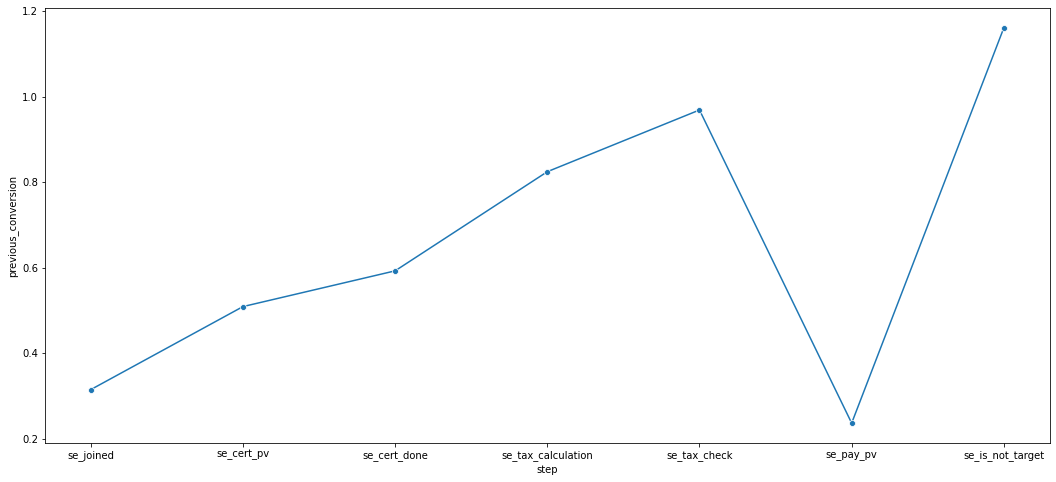

CPU times: total: 172 ms
Wall time: 157 ms


In [56]:
%%time

fig, ax = plt.subplots(nrows =1, ncols =1, figsize = (18,8))

sns.lineplot(
    data = df_signup_raw,
    x = 'step',
    y = 'previous_conversion',
    marker = 'o'
    )
plt.show()

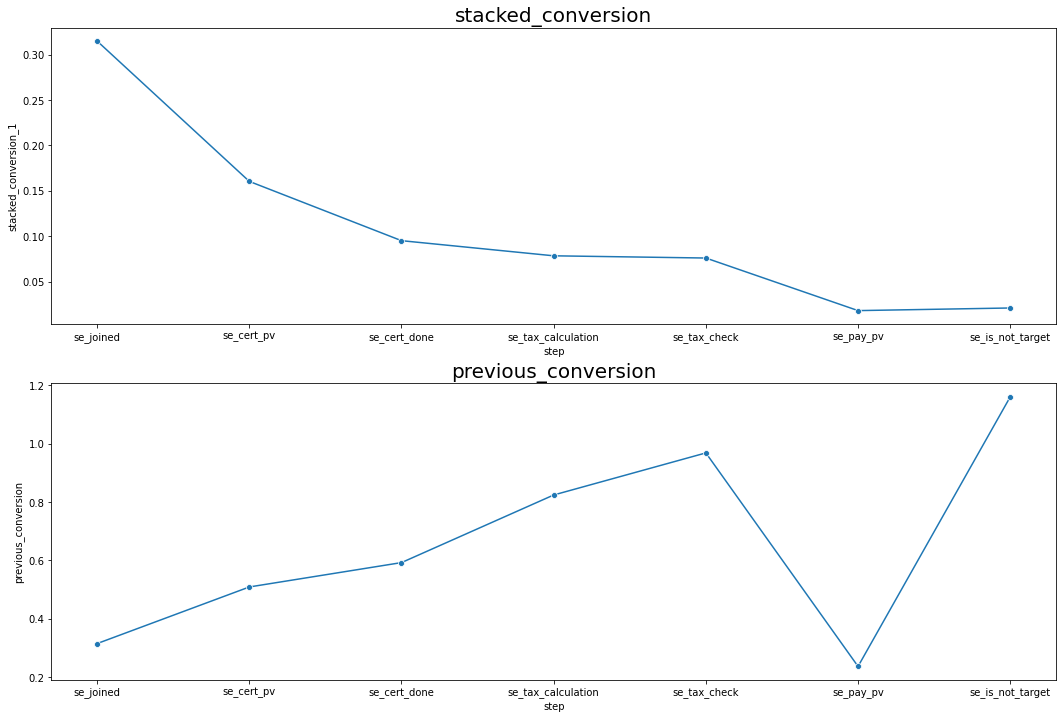

CPU times: total: 297 ms
Wall time: 306 ms


In [60]:
%%time

fig, ax = plt.subplots(nrows =2, ncols =1, figsize = (18,12))

sns.lineplot(
    data = df_signup_raw.iloc[1:, :], # .iloc[1:, :] : join 부터 시작
    x = 'step',
    y = 'stacked_conversion_1',
    marker = 'o',
    ax = ax[0]
    ).set_title('stacked_conversion', fontsize =20)

#seaborn 타이틀 = .set_title

sns.lineplot(
    data = df_signup_raw,
    x = 'step',
    y = 'previous_conversion',
    marker = 'o',
    ax = ax[1]
    ).set_title('previous_conversion', fontsize =20) 

plt.show()

#y축 인터벌이 안맞기 때문에, 감안해서 보기!
#y축 인터벌을 맞출 수 있지만, 코드가 복잡해져서 안했음

### 3.1.3. 가입전환율 드릴다운(연령별)

In [62]:
%%time
df_base.groupby(['basic', 'age_layer'])[df_base.columns[3:10].tolist()].agg('nunique').reset_index()

CPU times: total: 2.58 s
Wall time: 2.65 s


,basic,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv
0,1,20s,109880,97104,59990,52526,42020,39948,9806
1,1,30s,91655,77979,60197,52864,43915,42988,10385
2,1,40s,106767,83084,69152,58306,48946,47815,10610
3,1,50s,47311,26144,18445,13504,11108,10706,2630
4,1,60s,12017,6196,4804,3147,2687,2569,638
5,1,Unknown,1532657,308035,92206,314,269,264,68


In [63]:
%%time
df_base.groupby(['basic', 'age_layer'])[df_base.columns[3:10].tolist()].agg('nunique').reset_index().T

CPU times: total: 2.45 s
Wall time: 2.45 s


,0,1,2,3,4,5
basic,1,1,1,1,1,1
age_layer,20s,30s,40s,50s,60s,Unknown
se_inflowed,109880,91655,106767,47311,12017,1532657
se_joined,97104,77979,83084,26144,6196,308035
se_cert_pv,59990,60197,69152,18445,4804,92206
se_cert_done,52526,52864,58306,13504,3147,314
se_tax_calculation,42020,43915,48946,11108,2687,269
se_tax_check,39948,42988,47815,10706,2569,264
se_pay_pv,9806,10385,10610,2630,638,68


In [64]:
%%time
df_base.groupby(['basic', 'age_layer'])[df_base.columns[3:10].tolist()].agg('nunique').reset_index().T[1:]

CPU times: total: 2.25 s
Wall time: 2.32 s


,0,1,2,3,4,5
age_layer,20s,30s,40s,50s,60s,Unknown
se_inflowed,109880,91655,106767,47311,12017,1532657
se_joined,97104,77979,83084,26144,6196,308035
se_cert_pv,59990,60197,69152,18445,4804,92206
se_cert_done,52526,52864,58306,13504,3147,314
se_tax_calculation,42020,43915,48946,11108,2687,269
se_tax_check,39948,42988,47815,10706,2569,264
se_pay_pv,9806,10385,10610,2630,638,68


In [65]:
%%time
df_signup_age = df_base.groupby(['basic', 'age_layer'])[df_base.columns[3:10].tolist()].agg('nunique').reset_index()#.T[1:].reset_index()
df_signup_age

CPU times: total: 2.31 s
Wall time: 2.37 s


,basic,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv
0,1,20s,109880,97104,59990,52526,42020,39948,9806
1,1,30s,91655,77979,60197,52864,43915,42988,10385
2,1,40s,106767,83084,69152,58306,48946,47815,10610
3,1,50s,47311,26144,18445,13504,11108,10706,2630
4,1,60s,12017,6196,4804,3147,2687,2569,638
5,1,Unknown,1532657,308035,92206,314,269,264,68


In [66]:
df_signup_age

,basic,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv
0,1,20s,109880,97104,59990,52526,42020,39948,9806
1,1,30s,91655,77979,60197,52864,43915,42988,10385
2,1,40s,106767,83084,69152,58306,48946,47815,10610
3,1,50s,47311,26144,18445,13504,11108,10706,2630
4,1,60s,12017,6196,4804,3147,2687,2569,638
5,1,Unknown,1532657,308035,92206,314,269,264,68


In [67]:
df_signup_age.iloc[:-1, 1:]

,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv
0,20s,109880,97104,59990,52526,42020,39948,9806
1,30s,91655,77979,60197,52864,43915,42988,10385
2,40s,106767,83084,69152,58306,48946,47815,10610
3,50s,47311,26144,18445,13504,11108,10706,2630
4,60s,12017,6196,4804,3147,2687,2569,638


In [68]:
df_signup_age.melt?

In [69]:
df_signup_age.iloc[:-1, 1:].columns[1:].tolist()
#이해안가는 부분은 따로 실행해보기!

['se_inflowed',
 'se_joined',
 'se_cert_pv',
 'se_cert_done',
 'se_tax_calculation',
 'se_tax_check',
 'se_pay_pv']

In [72]:
#최종목적 : 연령대별 stp의 cnts 구하기!
## 하기와 같이 바꿔주는 이유 -> 시각화할때 한눈에 볼 수 있음 !
df_signup_age_v1 = df_signup_age.iloc[:-1, 1:].melt(
    id_vars = 'age_layer',
    value_vars = df_signup_age.iloc[:-1, 1:].columns[1:],
    var_name = 'step',
    value_name = 'cnts',
)

df_signup_age_v1

# df_signup_age_v1 = df_signup_age.iloc[:-1, 1:].melt(
#     id_vars = 'age_layer',
#     value_vars = 'se_inflowed',
                    #'se_joined',
                    #'se_cert_pv',
                    # se_cert_done',
                    # 'se_tax_calculation',
                    # 'se_tax_check',
                    # 'se_pay_pv',
#      var_name = 'step',
#     value_name = 'cnts',
# )

,age_layer,step,cnts
0,20s,se_inflowed,109880
1,30s,se_inflowed,91655
2,40s,se_inflowed,106767
3,50s,se_inflowed,47311
4,60s,se_inflowed,12017
5,20s,se_joined,97104
6,30s,se_joined,77979
7,40s,se_joined,83084
8,50s,se_joined,26144
9,60s,se_joined,6196


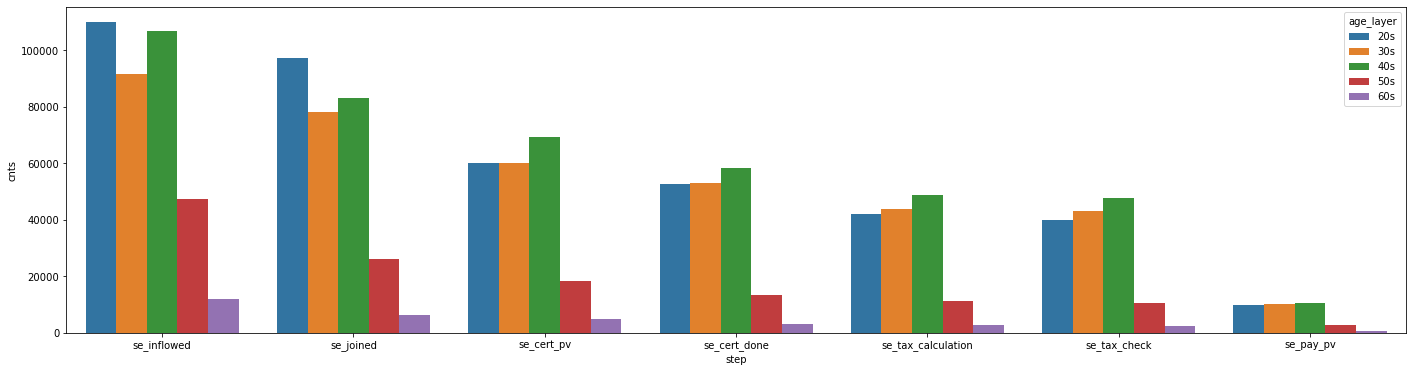

CPU times: total: 328 ms
Wall time: 331 ms


In [73]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = df_signup_age_v1,
    x = 'step',
    y = 'cnts',
    hue = 'age_layer' #파라미터
)

plt.show()

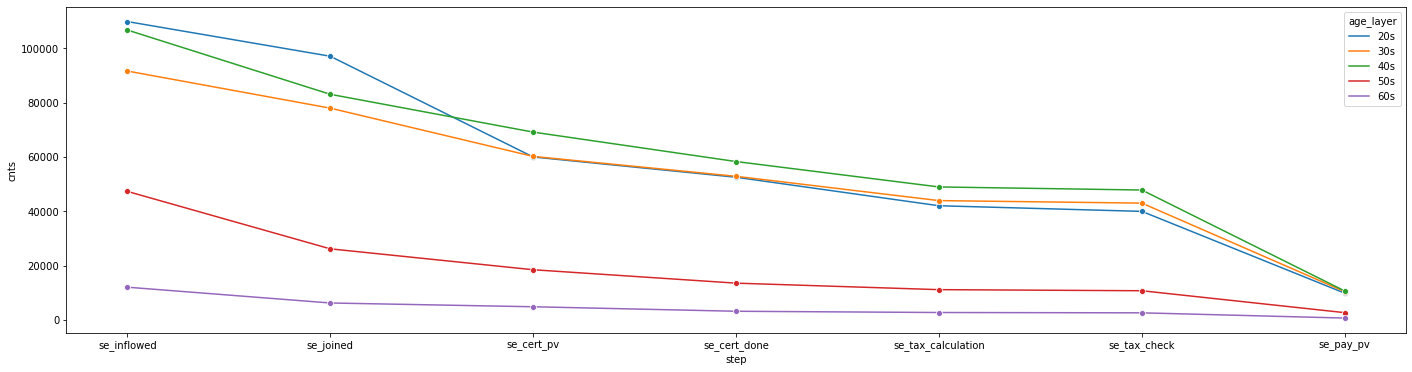

CPU times: total: 234 ms
Wall time: 255 ms


In [74]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_signup_age_v1,
    x = 'step',
    y = 'cnts',
    hue = 'age_layer',
    marker = 'o'
)

plt.show()

In [ ]:
# 각 연령대별 전환율

In [92]:
%%time
temp_df_20 = df_signup_age_v1[df_signup_age_v1['age_layer'] == '20s']
temp_df_20['conversion_raw'] = temp_df_20['cnts'].shift(1)
temp_df_20['conversion'] = temp_df_20['cnts']/temp_df_20['conversion_raw']
temp_df_20

CPU times: total: 46.9 ms
Wall time: 44 ms


,age_layer,step,cnts,conversion_raw,conversion
0,20s,se_inflowed,109880,NaN,NaN
5,20s,se_joined,97104,109880.0,0.883728
10,20s,se_cert_pv,59990,97104.0,0.617791
15,20s,se_cert_done,52526,59990.0,0.875579
20,20s,se_tax_calculation,42020,52526.0,0.799985
25,20s,se_tax_check,39948,42020.0,0.950690
30,20s,se_pay_pv,9806,39948.0,0.245469


In [93]:
temp_df_20

,age_layer,step,cnts,conversion_raw,conversion
0,20s,se_inflowed,109880,NaN,NaN
5,20s,se_joined,97104,109880.0,0.883728
10,20s,se_cert_pv,59990,97104.0,0.617791
15,20s,se_cert_done,52526,59990.0,0.875579
20,20s,se_tax_calculation,42020,52526.0,0.799985
25,20s,se_tax_check,39948,42020.0,0.950690
30,20s,se_pay_pv,9806,39948.0,0.245469


In [94]:
%%time

df_conversion = pd.DataFrame()

for temp_age in sorted(df_signup_age_v1['age_layer'].unique()):
    temp_df = df_signup_age_v1[df_signup_age_v1['age_layer'] == temp_age]
    temp_df['conversion_raw'] = temp_df['cnts'].shift(1)
    temp_df['conversion'] = temp_df['cnts']/temp_df['conversion_raw']
    first_value = temp_df.iloc[0, 2]
    temp_df['stacked_conversion'] = temp_df['cnts']/first_value

    df_conversion = pd.concat([df_conversion, temp_df], axis = 0, ignore_index = True)

CPU times: total: 172 ms
Wall time: 165 ms


In [95]:
df_conversion

,age_layer,step,cnts,conversion_raw,conversion,stacked_conversion
0,20s,se_inflowed,109880,NaN,NaN,1.000000
1,20s,se_joined,97104,109880.0,0.883728,0.883728
2,20s,se_cert_pv,59990,97104.0,0.617791,0.545959
3,20s,se_cert_done,52526,59990.0,0.875579,0.478031
4,20s,se_tax_calculation,42020,52526.0,0.799985,0.382417
5,20s,se_tax_check,39948,42020.0,0.950690,0.363560
6,20s,se_pay_pv,9806,39948.0,0.245469,0.089243
7,30s,se_inflowed,91655,NaN,NaN,1.000000
8,30s,se_joined,77979,91655.0,0.850788,0.850788
9,30s,se_cert_pv,60197,77979.0,0.771964,0.656778


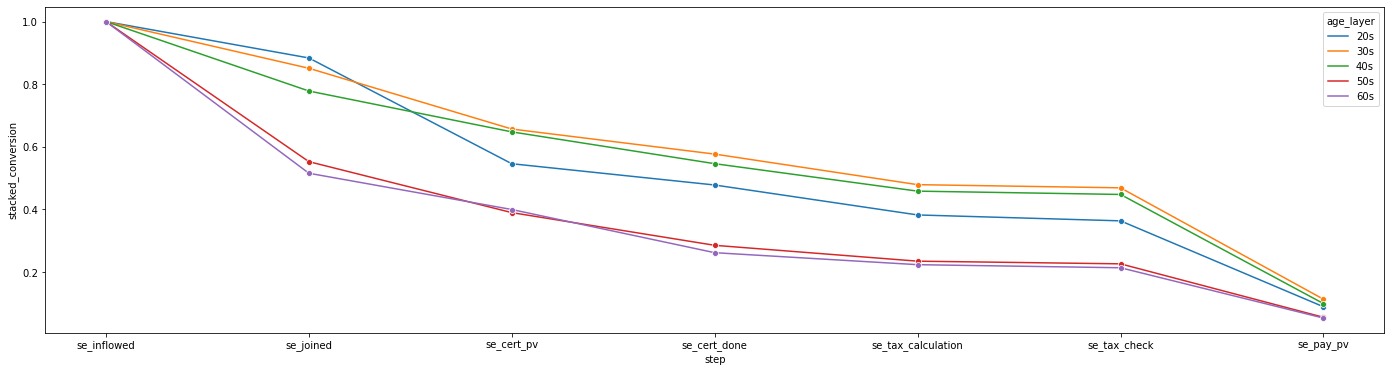

CPU times: total: 125 ms
Wall time: 134 ms


In [96]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_conversion,
    x = 'step',
    y = 'stacked_conversion',
    hue = 'age_layer',
    marker = 'o'
)

plt.show()

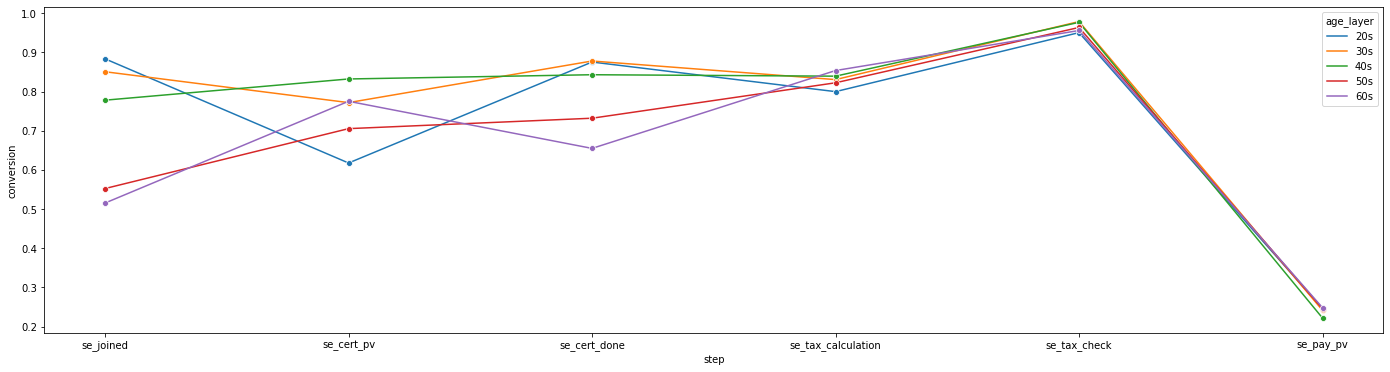

CPU times: total: 141 ms
Wall time: 141 ms


In [97]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_conversion,
    x = 'step',
    y = 'conversion',
    hue = 'age_layer',
    marker = 'o'
)

plt.show()

## 3.2. 친구소개

### 3.2.1. 데이터 준비

In [ ]:
df_ref_pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34550 entries, 2392 to 1902424
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dates      34550 non-null  object 
 1   age_layer  34550 non-null  object 
 2   se_pay_pv  34550 non-null  float64
 3   se_ref     1220 non-null   float64
 4   se_ref_kt  926 non-null    float64
 5   se_ref_lk  2 non-null      float64
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


In [ ]:
df_ref_none.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39798 entries, 863 to 1902427
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dates             39798 non-null  object 
 1   age_layer         39798 non-null  object 
 2   se_is_not_target  39798 non-null  float64
 3   se_ref            1083 non-null   float64
 4   se_ref_kt         647 non-null    float64
 5   se_ref_lk         1 non-null      float64
dtypes: float64(4), object(2)
memory usage: 2.1+ MB


In [ ]:
df_ref_pay.head()

,dates,age_layer,se_pay_pv,se_ref,se_ref_kt,se_ref_lk
2392,2021-04-25,40s,1.650849e+12,NaN,NaN,NaN
4586,2021-04-23,50s,1.650713e+12,NaN,NaN,NaN
9742,2021-04-24,40s,1.650771e+12,NaN,NaN,NaN
10543,2021-04-25,50s,1.650891e+12,NaN,NaN,NaN
11698,2021-04-28,40s,1.651144e+12,NaN,NaN,NaN


In [ ]:
df_ref_none.head()

,dates,age_layer,se_is_not_target,se_ref,se_ref_kt,se_ref_lk
863,2021-04-23,40s,1.650707e+12,NaN,NaN,NaN
993,2021-04-26,20s,1.650973e+12,NaN,NaN,NaN
1552,2021-04-26,40s,1.650948e+12,NaN,NaN,NaN
2362,2021-04-28,30s,1.651121e+12,NaN,NaN,NaN
3138,2021-04-28,30s,1.651117e+12,NaN,NaN,NaN


In [ ]:
df_ref_pay = df_ref_pay.groupby(['dates', 'age_layer'])[df_ref_pay.columns[2:]].agg('nunique').reset_index()
df_ref_none = df_ref_none.groupby(['dates', 'age_layer'])[df_ref_none.columns[2:]].agg('nunique').reset_index()

In [ ]:
df_ref_pay.head(2)

,dates,age_layer,se_pay_pv,se_ref,se_ref_kt,se_ref_lk
0,2021-04-23,20s,1651,40,25,0
1,2021-04-23,30s,2110,55,43,1


In [ ]:
df_ref_none.head(2)

,dates,age_layer,se_is_not_target,se_ref,se_ref_kt,se_ref_lk
0,2021-04-23,20s,960,46,19,0
1,2021-04-23,30s,2255,58,32,0


In [ ]:
df_ref = df_ref_pay.merge(df_ref_none, how = 'inner', on = ['dates', 'age_layer'], copy = False)
df_ref.head(2)

,dates,age_layer,se_pay_pv,se_ref_x,se_ref_kt_x,se_ref_lk_x,se_is_not_target,se_ref_y,se_ref_kt_y,se_ref_lk_y
0,2021-04-23,20s,1651,40,25,0,960,46,19,0
1,2021-04-23,30s,2110,55,43,1,2255,58,32,0


In [ ]:
df_ref['01_ref_button'] = df_ref['se_pay_pv'] + df_ref['se_is_not_target']
df_ref['02_ref_page_entered'] = df_ref['se_ref_x'] + df_ref['se_ref_y']
df_ref['03_ref_tried'] = df_ref['se_ref_kt_x'] + df_ref['se_ref_lk_x'] + df_ref['se_ref_kt_y'] + df_ref['se_ref_lk_y']

df_ref

,dates,age_layer,se_pay_pv,se_ref_x,se_ref_kt_x,se_ref_lk_x,se_is_not_target,se_ref_y,se_ref_kt_y,se_ref_lk_y,01_ref_button,02_ref_page_entered,03_ref_tried
0,2021-04-23,20s,1651,40,25,0,960,46,19,0,2611,86,44
1,2021-04-23,30s,2110,55,43,1,2255,58,32,0,4365,113,76
2,2021-04-23,40s,2002,93,79,0,3203,68,40,0,5205,161,119
3,2021-04-23,50s,388,22,18,0,731,34,20,1,1119,56,39
4,2021-04-23,60s,129,9,7,0,196,4,1,0,325,13,8
5,2021-04-23,Unknown,7,0,0,0,17,0,0,0,24,0,0
6,2021-04-24,20s,1766,30,17,0,1118,49,25,0,2884,79,42
7,2021-04-24,30s,2061,74,52,0,2305,53,25,0,4366,127,77
8,2021-04-24,40s,1808,60,49,1,3067,61,37,0,4875,121,87
9,2021-04-24,50s,463,20,16,0,837,26,21,0,1300,46,37


In [ ]:
df_ref = df_ref[['dates', 'age_layer', '01_ref_button', '02_ref_page_entered', '03_ref_tried']]
df_ref

,dates,age_layer,01_ref_button,02_ref_page_entered,03_ref_tried
0,2021-04-23,20s,2611,86,44
1,2021-04-23,30s,4365,113,76
2,2021-04-23,40s,5205,161,119
3,2021-04-23,50s,1119,56,39
4,2021-04-23,60s,325,13,8
5,2021-04-23,Unknown,24,0,0
6,2021-04-24,20s,2884,79,42
7,2021-04-24,30s,4366,127,77
8,2021-04-24,40s,4875,121,87
9,2021-04-24,50s,1300,46,37


In [ ]:
df_ref.melt(
    id_vars = ['dates', 'age_layer'],
    value_vars = df_ref.columns[2:],
    var_name = 'step',
    value_name = 'cnts',
)

,dates,age_layer,step,cnts
0,2021-04-23,20s,01_ref_button,2611
1,2021-04-23,30s,01_ref_button,4365
2,2021-04-23,40s,01_ref_button,5205
3,2021-04-23,50s,01_ref_button,1119
4,2021-04-23,60s,01_ref_button,325
...,...,...,...,...
103,2021-04-28,30s,03_ref_tried,26
104,2021-04-28,40s,03_ref_tried,54
105,2021-04-28,50s,03_ref_tried,21
106,2021-04-28,60s,03_ref_tried,7


In [ ]:
df_ref_raws\
 = df_ref.melt(
    id_vars = ['dates', 'age_layer'],
    value_vars = df_ref.columns[2:],
    var_name = 'step',
    value_name = 'cnts',
).sort_values(by = ['dates', 'age_layer', 'step'], ascending = True, ignore_index = True)

In [ ]:
df_ref_raws

,dates,age_layer,step,cnts
0,2021-04-23,20s,01_ref_button,2611
1,2021-04-23,20s,02_ref_page_entered,86
2,2021-04-23,20s,03_ref_tried,44
3,2021-04-23,30s,01_ref_button,4365
4,2021-04-23,30s,02_ref_page_entered,113
...,...,...,...,...
103,2021-04-28,60s,02_ref_page_entered,10
104,2021-04-28,60s,03_ref_tried,7
105,2021-04-28,Unknown,01_ref_button,15
106,2021-04-28,Unknown,02_ref_page_entered,1


### 3.2.2. total 친구소개

In [ ]:
df_ref_raws.groupby(['step'])['cnts'].agg('sum').reset_index()

,step,cnts
0,01_ref_button,73762
1,02_ref_page_entered,2262
2,03_ref_tried,1535


In [ ]:
total_df_ref = df_ref_raws.groupby(['step'])['cnts'].agg('sum').reset_index()

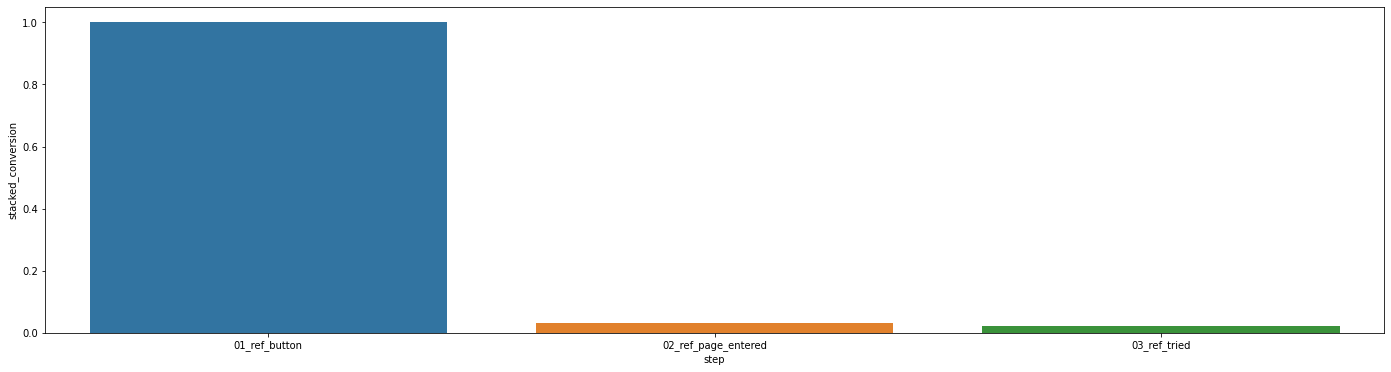

CPU times: user 274 ms, sys: 5.81 ms, total: 280 ms
Wall time: 471 ms


In [ ]:
%%time
# 누적 전환율
total_df_ref['first_value'] = total_df_ref.iloc[0, 1]
total_df_ref['stacked_conversion'] = total_df_ref['cnts']/total_df_ref['first_value']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = total_df_ref,
    x = 'step',
    y = 'stacked_conversion'
)

plt.show()

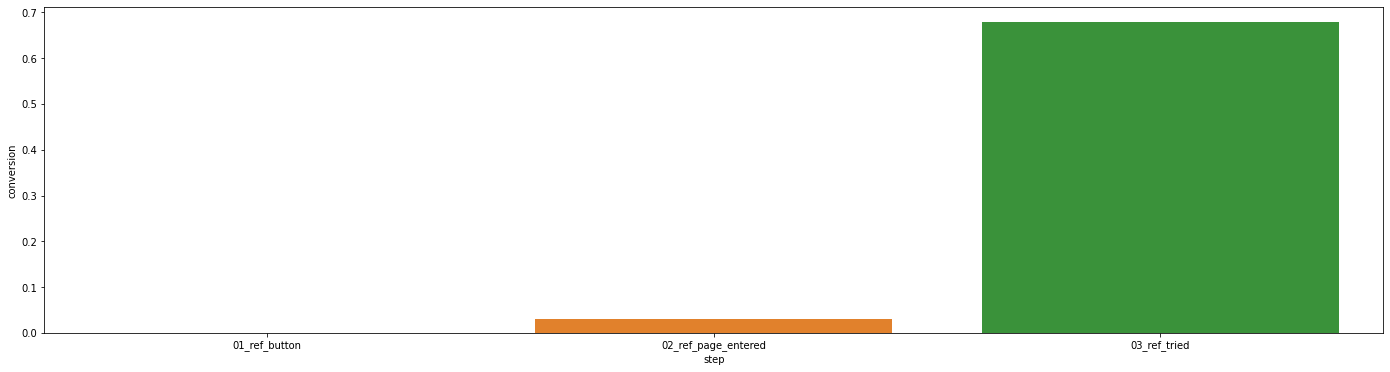

CPU times: user 262 ms, sys: 941 µs, total: 263 ms
Wall time: 344 ms


In [ ]:
%%time
# 직전 전환율
total_df_ref['previous_step'] = total_df_ref['cnts'].shift(1)
total_df_ref['conversion'] = total_df_ref['cnts']/total_df_ref['previous_step']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = total_df_ref,
    x = 'step',
    y = 'conversion'
)

plt.show()

### 3.2.2. 친구소개 드릴다운

In [ ]:
# total ref 만들기 직전 df
df_ref_raws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dates      108 non-null    object
 1   age_layer  108 non-null    object
 2   step       108 non-null    object
 3   cnts       108 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 3.5+ KB


In [ ]:
df_ref_raws_age = df_ref_raws.groupby(['age_layer', 'step'])['cnts'].agg('sum').reset_index()
df_ref_raws_age

,age_layer,step,cnts
0,20s,01_ref_button,15808
1,20s,02_ref_page_entered,482
2,20s,03_ref_tried,268
3,30s,01_ref_button,21609
4,30s,02_ref_page_entered,631
5,30s,03_ref_tried,427
6,40s,01_ref_button,27465
7,40s,02_ref_page_entered,801
8,40s,03_ref_tried,583
9,50s,01_ref_button,7000


In [ ]:
df_ref_raws_age['previous_step'] = np.where(df_ref_raws_age['step'] == '01_ref_button', np.nan, df_ref_raws_age['cnts'].shift(1))
df_ref_raws_age['previous_conversion'] = df_ref_raws_age['cnts']/df_ref_raws_age['previous_step']
df_ref_raws_age

,age_layer,step,cnts,previous_step,previous_conversion
0,20s,01_ref_button,15808,NaN,NaN
1,20s,02_ref_page_entered,482,15808.0,0.030491
2,20s,03_ref_tried,268,482.0,0.556017
3,30s,01_ref_button,21609,NaN,NaN
4,30s,02_ref_page_entered,631,21609.0,0.029201
5,30s,03_ref_tried,427,631.0,0.676704
6,40s,01_ref_button,27465,NaN,NaN
7,40s,02_ref_page_entered,801,27465.0,0.029164
8,40s,03_ref_tried,583,801.0,0.727840
9,50s,01_ref_button,7000,NaN,NaN


In [ ]:
df_ref_raws_age['first_value'] = df_ref_raws_age.groupby(['age_layer'])['cnts'].transform('max')
df_ref_raws_age['stacked_conversion'] = df_ref_raws_age['cnts']/df_ref_raws_age['first_value']
df_ref_raws_age.head(9)

,age_layer,step,cnts,previous_step,previous_conversion,first_value,stacked_conversion
0,20s,01_ref_button,15808,NaN,NaN,15808,1.000000
1,20s,02_ref_page_entered,482,15808.0,0.030491,15808,0.030491
2,20s,03_ref_tried,268,482.0,0.556017,15808,0.016953
3,30s,01_ref_button,21609,NaN,NaN,21609,1.000000
4,30s,02_ref_page_entered,631,21609.0,0.029201,21609,0.029201
5,30s,03_ref_tried,427,631.0,0.676704,21609,0.019760
6,40s,01_ref_button,27465,NaN,NaN,27465,1.000000
7,40s,02_ref_page_entered,801,27465.0,0.029164,27465,0.029164
8,40s,03_ref_tried,583,801.0,0.727840,27465,0.021227


In [ ]:
df_ref_raws_age.tail(9)

,age_layer,step,cnts,previous_step,previous_conversion,first_value,stacked_conversion
9,50s,01_ref_button,7000,NaN,NaN,7000,1.000000
10,50s,02_ref_page_entered,289,7000.0,0.041286,7000,0.041286
11,50s,03_ref_tried,219,289.0,0.757785,7000,0.031286
12,60s,01_ref_button,1710,NaN,NaN,1710,1.000000
13,60s,02_ref_page_entered,54,1710.0,0.031579,1710,0.031579
14,60s,03_ref_tried,37,54.0,0.685185,1710,0.021637
15,Unknown,01_ref_button,170,NaN,NaN,170,1.000000
16,Unknown,02_ref_page_entered,5,170.0,0.029412,170,0.029412
17,Unknown,03_ref_tried,1,5.0,0.200000,170,0.005882


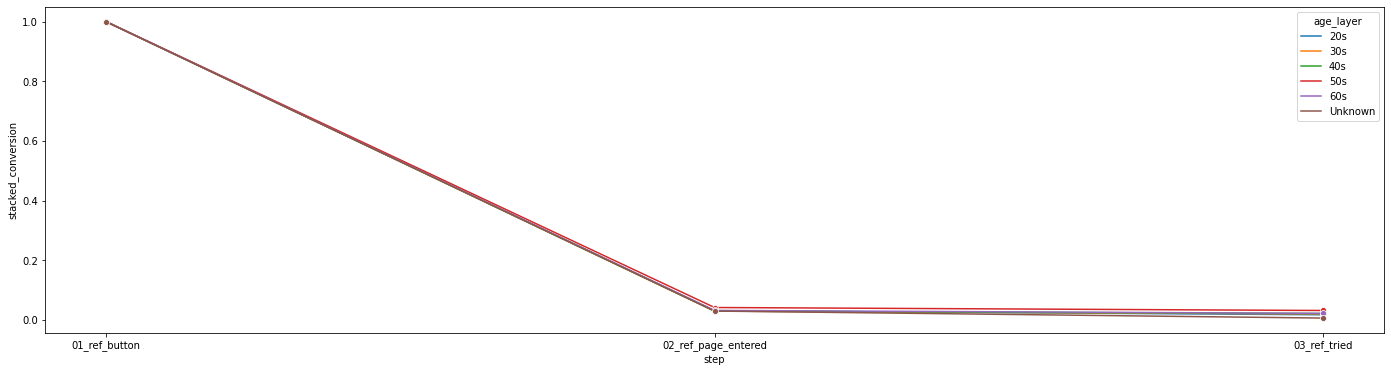

CPU times: user 391 ms, sys: 9.44 ms, total: 401 ms
Wall time: 541 ms


In [ ]:
%%time
# 누적전환율
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_ref_raws_age,
    x = 'step',
    y = 'stacked_conversion',
    hue = 'age_layer',
    marker = 'o'
)

plt.show()

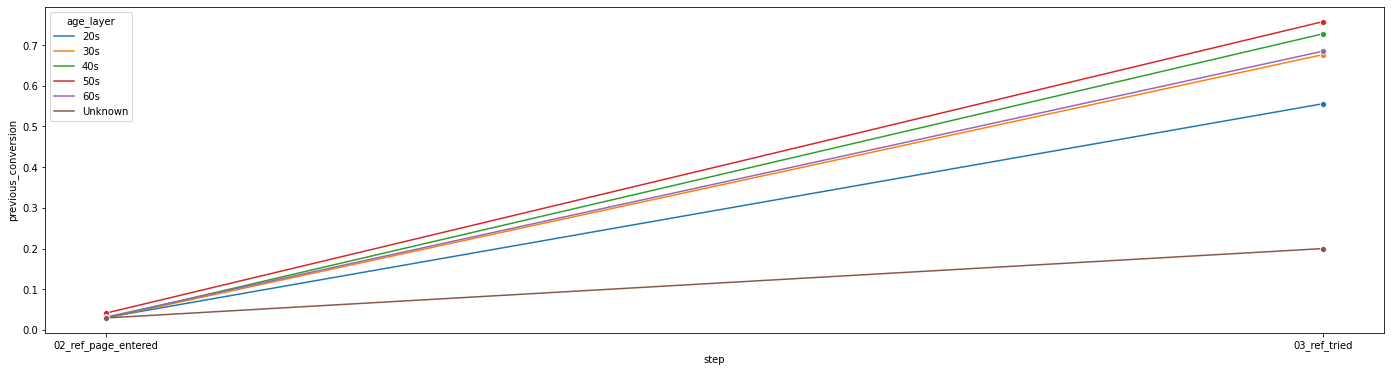

CPU times: user 420 ms, sys: 13 ms, total: 433 ms
Wall time: 640 ms


In [ ]:
%%time
# 직전전환율
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_ref_raws_age,
    x = 'step',
    y = 'previous_conversion',
    hue = 'age_layer',
    marker = 'o'
)

plt.show()

# _4. 체류시간

## 4.1. 라이브러리 불러오기 및 data type 변경

In [ ]:
# date 관련 library
from datetime import *

In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902435 entries, 0 to 1902434
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   dates                  object 
 1   hours                  int64  
 2   age_layer              object 
 3   se_inflowed            int64  
 4   se_joined              float64
 5   se_cert_pv             float64
 6   se_cert_done           float64
 7   se_tax_calculation     float64
 8   se_tax_check           float64
 9   se_pay_pv              float64
 10  se_is_not_target       float64
 11  se_ref                 float64
 12  se_ref_kt              float64
 13  se_ref_lk              float64
 14  se_additional_info_pv  float64
 15  se_add_done            float64
 16  se_edit_done           float64
 17  se_save_done           float64
 18  et_inflowed            object 
 19  et_joined              object 
 20  et_cert_pv             object 
 21  et_cert_done           object 
 22  et_tax_calculation

다음 단계로 진입한 회원만 시간이 잡히므로,  
이탈 한 사람들은 얼마나 머물렀는 지 모른다  

다만 화면 체류시간 분포를 가늠하면서  
어떠한 이슈가 있는 지 추정해보고 가설세워 AB테스트로 검증하는 작업 반복

In [ ]:
category

['dates', 'hours', 'age_layer']

In [ ]:
df_base.columns[18:32+1].tolist()

['et_inflowed',
 'et_joined',
 'et_cert_pv',
 'et_cert_done',
 'et_tax_calculation',
 'et_tax_check',
 'et_pay_pv',
 'et_is_not_target',
 'et_ref',
 'et_ref_kt',
 'et_ref_lk',
 'et_additional_info_pv',
 'et_add_done',
 'et_edit_done',
 'et_save_done']

In [ ]:
category_v1 = category.copy()
for i in df_base.columns[18:32+1].tolist():
    category_v1.append(i)
    print(category_v1) 

['dates', 'hours', 'age_layer', 'et_inflowed']
['dates', 'hours', 'age_layer', 'et_inflowed', 'et_joined']
['dates', 'hours', 'age_layer', 'et_inflowed', 'et_joined', 'et_cert_pv']
['dates', 'hours', 'age_layer', 'et_inflowed', 'et_joined', 'et_cert_pv', 'et_cert_done']
['dates', 'hours', 'age_layer', 'et_inflowed', 'et_joined', 'et_cert_pv', 'et_cert_done', 'et_tax_calculation']
['dates', 'hours', 'age_layer', 'et_inflowed', 'et_joined', 'et_cert_pv', 'et_cert_done', 'et_tax_calculation', 'et_tax_check']
['dates', 'hours', 'age_layer', 'et_inflowed', 'et_joined', 'et_cert_pv', 'et_cert_done', 'et_tax_calculation', 'et_tax_check', 'et_pay_pv']
['dates', 'hours', 'age_layer', 'et_inflowed', 'et_joined', 'et_cert_pv', 'et_cert_done', 'et_tax_calculation', 'et_tax_check', 'et_pay_pv', 'et_is_not_target']
['dates', 'hours', 'age_layer', 'et_inflowed', 'et_joined', 'et_cert_pv', 'et_cert_done', 'et_tax_calculation', 'et_tax_check', 'et_pay_pv', 'et_is_not_target', 'et_ref']
['dates', 'hours

In [ ]:
df_et = df_base[category_v1]
df_et.head()

,dates,hours,age_layer,et_inflowed,et_joined,et_cert_pv,et_cert_done,et_tax_calculation,et_tax_check,et_pay_pv,et_is_not_target,et_ref,et_ref_kt,et_ref_lk,et_additional_info_pv,et_add_done,et_edit_done,et_save_done
0,2021-04-29,1,Unknown,2021-04-29 01:41:19.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-29,4,Unknown,2021-04-29 04:51:10.978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-29,3,Unknown,2021-04-29 03:57:55.571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-28,10,Unknown,2021-04-28 10:00:51.887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-28,21,Unknown,2021-04-28 21:38:14.822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_et.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902435 entries, 0 to 1902434
Data columns (total 18 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   dates                  object
 1   hours                  int64 
 2   age_layer              object
 3   et_inflowed            object
 4   et_joined              object
 5   et_cert_pv             object
 6   et_cert_done           object
 7   et_tax_calculation     object
 8   et_tax_check           object
 9   et_pay_pv              object
 10  et_is_not_target       object
 11  et_ref                 object
 12  et_ref_kt              object
 13  et_ref_lk              object
 14  et_additional_info_pv  object
 15  et_add_done            object
 16  et_edit_done           object
 17  et_save_done           object
dtypes: int64(1), object(17)
memory usage: 261.3+ MB


In [ ]:
%%time
for temp_et in df_et.columns[3:]:
    df_et[temp_et] = pd.to_datetime(df_et[temp_et])

df_et.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902435 entries, 0 to 1902434
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   dates                  object        
 1   hours                  int64         
 2   age_layer              object        
 3   et_inflowed            datetime64[ns]
 4   et_joined              datetime64[ns]
 5   et_cert_pv             datetime64[ns]
 6   et_cert_done           datetime64[ns]
 7   et_tax_calculation     datetime64[ns]
 8   et_tax_check           datetime64[ns]
 9   et_pay_pv              datetime64[ns]
 10  et_is_not_target       datetime64[ns]
 11  et_ref                 datetime64[ns]
 12  et_ref_kt              datetime64[ns]
 13  et_ref_lk              datetime64[ns]
 14  et_additional_info_pv  datetime64[ns]
 15  et_add_done            datetime64[ns]
 16  et_edit_done           datetime64[ns]
 17  et_save_done           datetime64[ns]
dtypes: datetime64[ns](15),

## 4.2. 체류시간 산출

In [ ]:
%%time
# df_et['stay_inflowed'] = (df_et['et_joined'] - df_et['et_inflowed']).astype('timedelta64[s]')
df_et['stay_inflowed'] = (df_et['et_joined'] - df_et['et_inflowed']).astype('timedelta64[ms]')/1000

CPU times: user 74.1 ms, sys: 7.92 ms, total: 82.1 ms
Wall time: 79.4 ms


In [ ]:
df_et[['et_inflowed', 'et_joined', 'stay_inflowed']].sample(5)

,et_inflowed,et_joined,stay_inflowed
786786,2021-04-26 19:10:00.713,NaT,NaN
1468508,2021-04-25 17:17:21.732,NaT,NaN
1085024,2021-04-24 13:14:54.502,2021-04-24 13:14:59.563,5.061
368109,2021-04-27 13:13:39.088,2021-04-27 13:13:44.869,5.781
398275,2021-04-24 20:17:20.969,NaT,NaN


In [ ]:
df_et['stay_joined'] = (df_et['et_cert_pv'] - df_et['et_joined']).astype('timedelta64[ms]')/1000
df_et['stay_cert'] = (df_et['et_cert_done'] - df_et['et_cert_pv']).astype('timedelta64[ms]')/1000

In [ ]:
df_et[['dates', 'hours', 'age_layer', 'stay_inflowed', 'stay_joined', 'stay_cert']].sample(5)

,dates,hours,age_layer,stay_inflowed,stay_joined,stay_cert
495894,2021-04-27,14,Unknown,NaN,NaN,NaN
1645190,2021-04-23,14,Unknown,NaN,NaN,NaN
953179,2021-04-23,22,Unknown,6.633,NaN,NaN
443341,2021-04-27,18,Unknown,5.840,NaN,NaN
1432420,2021-04-25,19,Unknown,NaN,NaN,NaN


In [ ]:
df_stay = df_et[['dates', 'hours', 'age_layer', 'stay_inflowed', 'stay_joined', 'stay_cert']]
df_stay.head()

,dates,hours,age_layer,stay_inflowed,stay_joined,stay_cert
0,2021-04-29,1,Unknown,NaN,NaN,NaN
1,2021-04-29,4,Unknown,NaN,NaN,NaN
2,2021-04-29,3,Unknown,NaN,NaN,NaN
3,2021-04-28,10,Unknown,NaN,NaN,NaN
4,2021-04-28,21,Unknown,NaN,NaN,NaN


In [ ]:
df_stay.sample(10)

,dates,hours,age_layer,stay_inflowed,stay_joined,stay_cert
178175,2021-04-27,9,Unknown,NaN,NaN,NaN
1879020,2021-04-26,15,50s,15.863,14.719,107.850
1030241,2021-04-24,9,Unknown,NaN,NaN,NaN
263948,2021-04-26,23,Unknown,NaN,NaN,NaN
1379281,2021-04-27,17,Unknown,NaN,NaN,NaN
1566545,2021-04-26,12,Unknown,NaN,NaN,NaN
1685759,2021-04-24,20,Unknown,NaN,NaN,NaN
1890849,2021-04-24,5,Unknown,9.648,NaN,NaN
1221429,2021-04-23,16,20s,11.382,25.045,45.013
1161659,2021-04-25,2,30s,6.536,NaN,NaN


In [ ]:
df_stay_inflowed = df_stay[df_stay['stay_inflowed'].notnull()]
df_stay_inflowed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600316 entries, 10 to 1902434
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   dates          600316 non-null  object 
 1   hours          600316 non-null  int64  
 2   age_layer      600316 non-null  object 
 3   stay_inflowed  600316 non-null  float64
 4   stay_joined    306358 non-null  float64
 5   stay_cert      181986 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 32.1+ MB


## 4.3. 체류 시간 분포 확인

### 4.3.1. 유입 화면

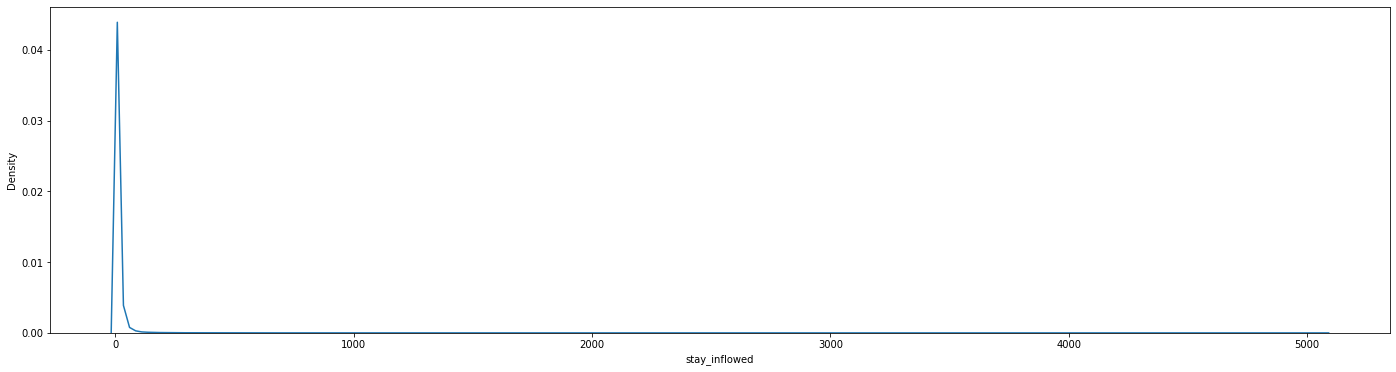

CPU times: user 2.77 s, sys: 229 ms, total: 3 s
Wall time: 2.88 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(df_stay_inflowed['stay_inflowed'], hist = False)

plt.show()

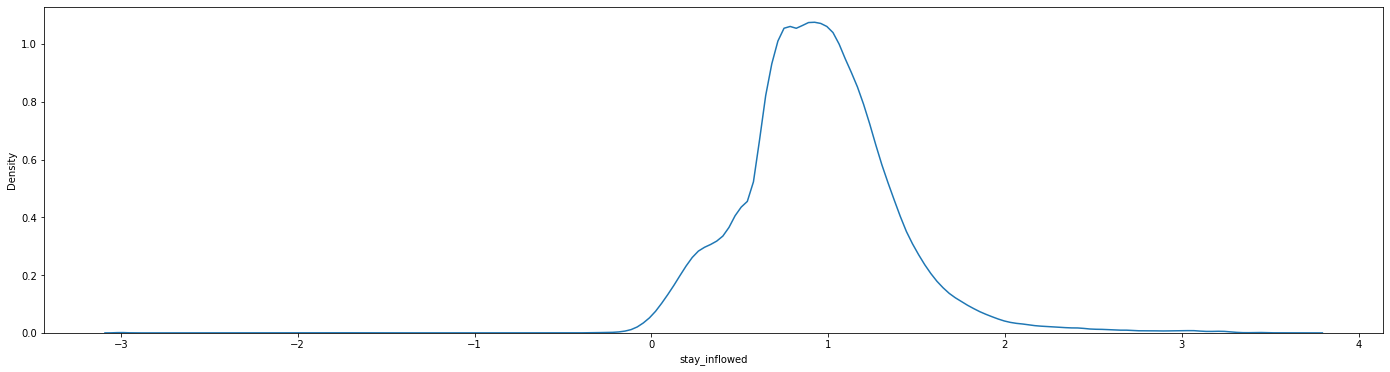

CPU times: user 3.23 s, sys: 142 ms, total: 3.37 s
Wall time: 3.24 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed['stay_inflowed']), hist = False)

plt.show()

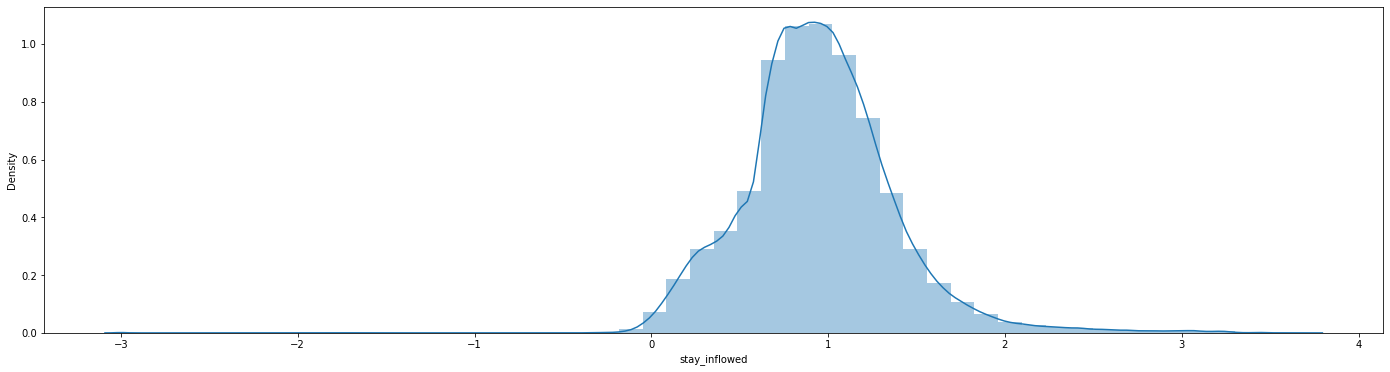

CPU times: user 3.18 s, sys: 60.5 ms, total: 3.24 s
Wall time: 3.23 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed['stay_inflowed']), hist = True)

plt.show()

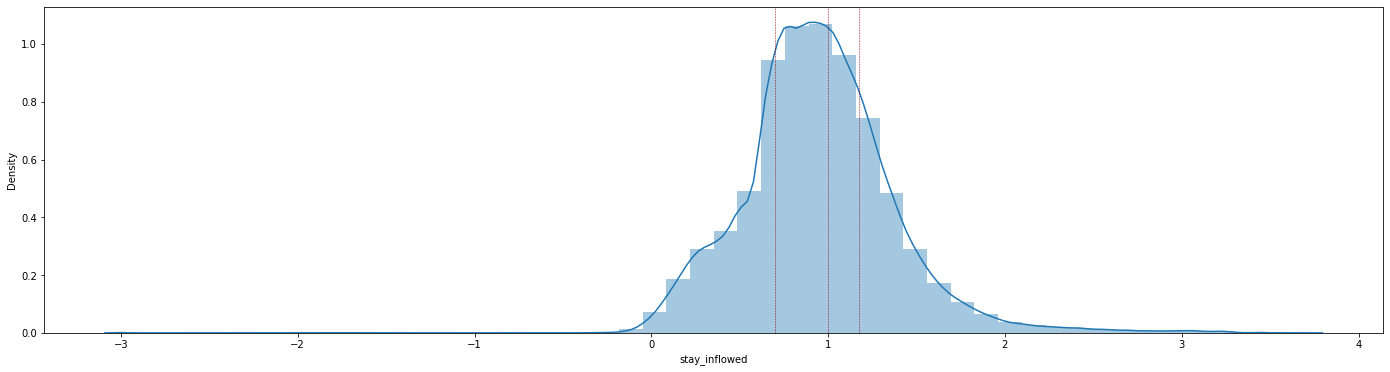

CPU times: user 3.28 s, sys: 227 ms, total: 3.5 s
Wall time: 3.25 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed['stay_inflowed']), hist = True)
plt.axvline(np.log10(5), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(10), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(15), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.show()

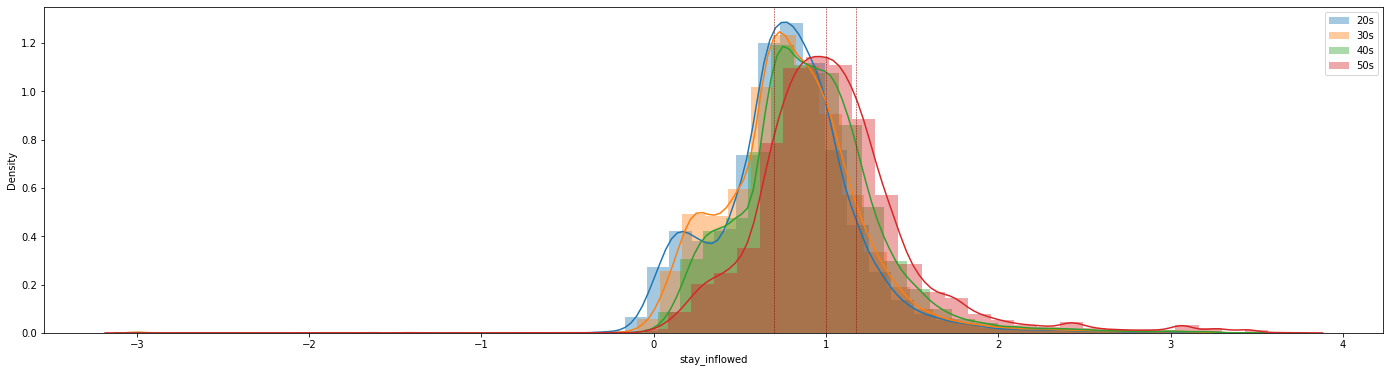

CPU times: user 2.61 s, sys: 561 ms, total: 3.17 s
Wall time: 2.56 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '20s']['stay_inflowed']), hist = True, label = '20s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '30s']['stay_inflowed']), hist = True, label = '30s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '40s']['stay_inflowed']), hist = True, label = '40s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '50s']['stay_inflowed']), hist = True, label = '50s')


plt.axvline(np.log10(5), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(10), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(15), color = 'darkred', linestyle = '--', linewidth = 0.5)

plt.legend()
plt.show()

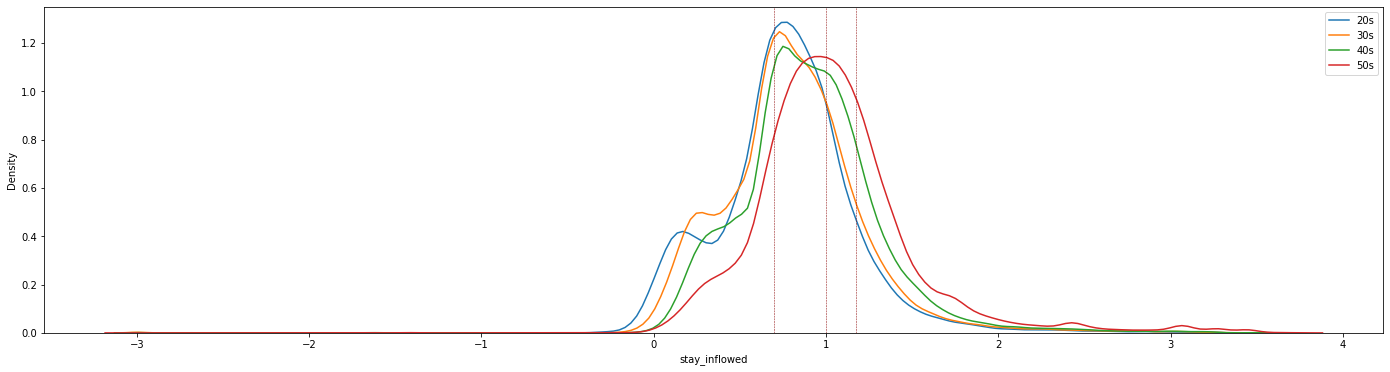

CPU times: user 2.23 s, sys: 566 ms, total: 2.8 s
Wall time: 2.2 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '20s']['stay_inflowed']), hist = False, label = '20s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '30s']['stay_inflowed']), hist = False, label = '30s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '40s']['stay_inflowed']), hist = False, label = '40s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '50s']['stay_inflowed']), hist = False, label = '50s')


plt.axvline(np.log10(5), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(10), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(15), color = 'darkred', linestyle = '--', linewidth = 0.5)

plt.legend()
plt.show()

#### 유입화면 체류시간 trend

In [ ]:
df_stay_inflowed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600316 entries, 10 to 1902434
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   dates          600316 non-null  object 
 1   hours          600316 non-null  int64  
 2   age_layer      600316 non-null  object 
 3   stay_inflowed  600316 non-null  float64
 4   stay_joined    306358 non-null  float64
 5   stay_cert      181986 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 32.1+ MB


In [ ]:
df_stay_inflowed.groupby(['dates'])['stay_inflowed'].agg('mean').reset_index()

,dates,stay_inflowed
0,2021-04-23,17.227283
1,2021-04-24,18.698384
2,2021-04-25,18.569290
3,2021-04-26,18.165601
4,2021-04-27,25.727941
5,2021-04-28,20.442823
6,2021-04-29,26.626346


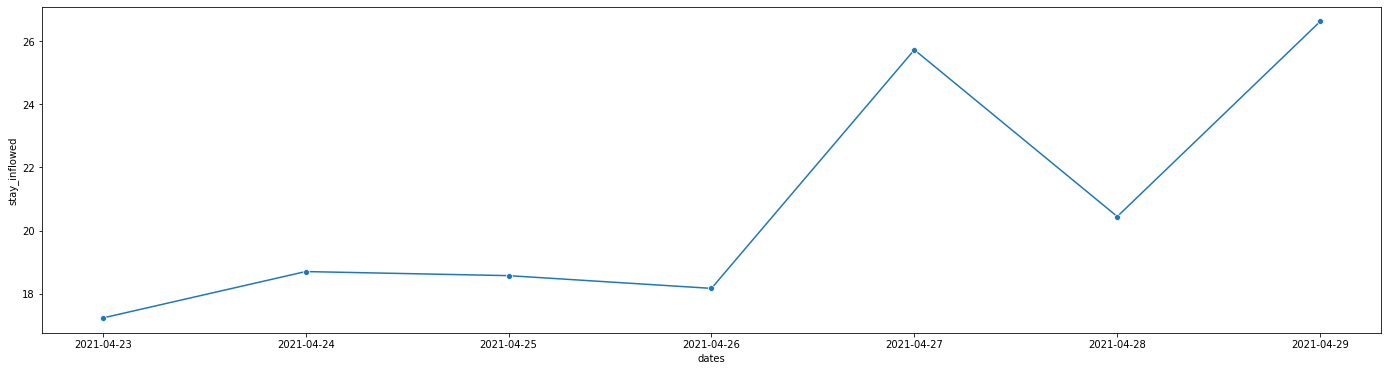

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.lineplot(
    data = df_stay_inflowed.groupby(['dates'])['stay_inflowed'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_inflowed',
    marker = 'o'
)

plt.show()

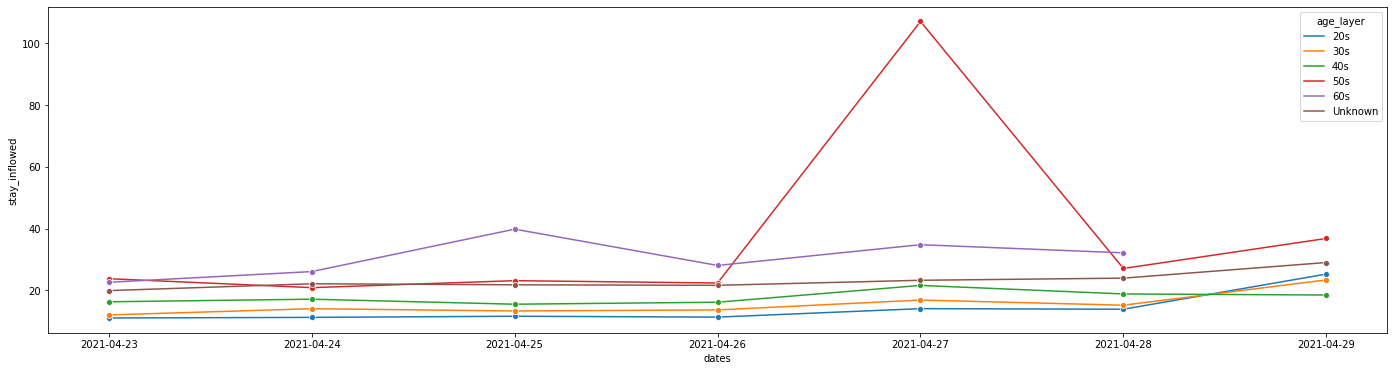

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.lineplot(
    data = df_stay_inflowed.groupby(['dates', 'age_layer'])['stay_inflowed'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_inflowed',
    hue = 'age_layer',
    marker = 'o'
)

plt.show()

### 4.3.2. 가입 화면

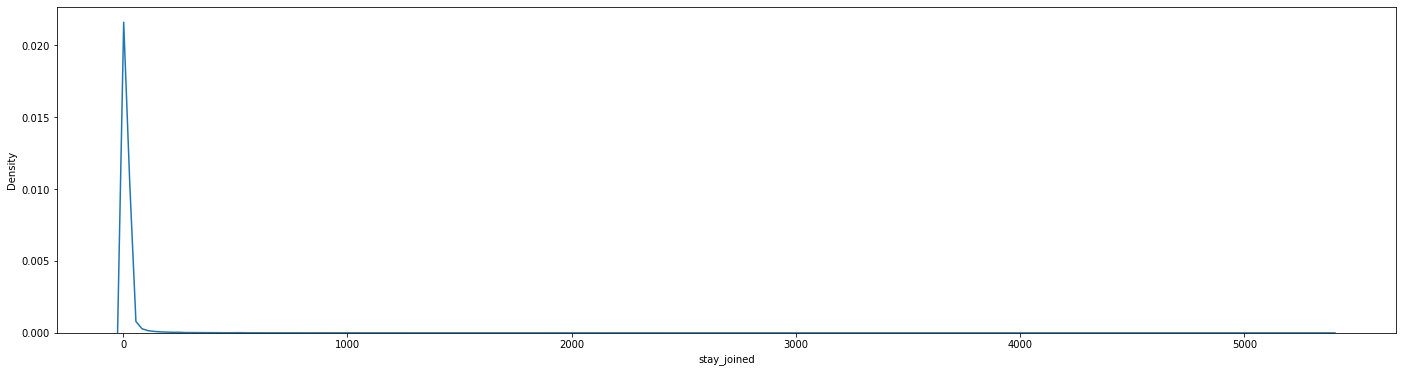

CPU times: user 1.58 s, sys: 147 ms, total: 1.72 s
Wall time: 1.6 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(df_stay_inflowed['stay_joined'], hist = False)

plt.show()

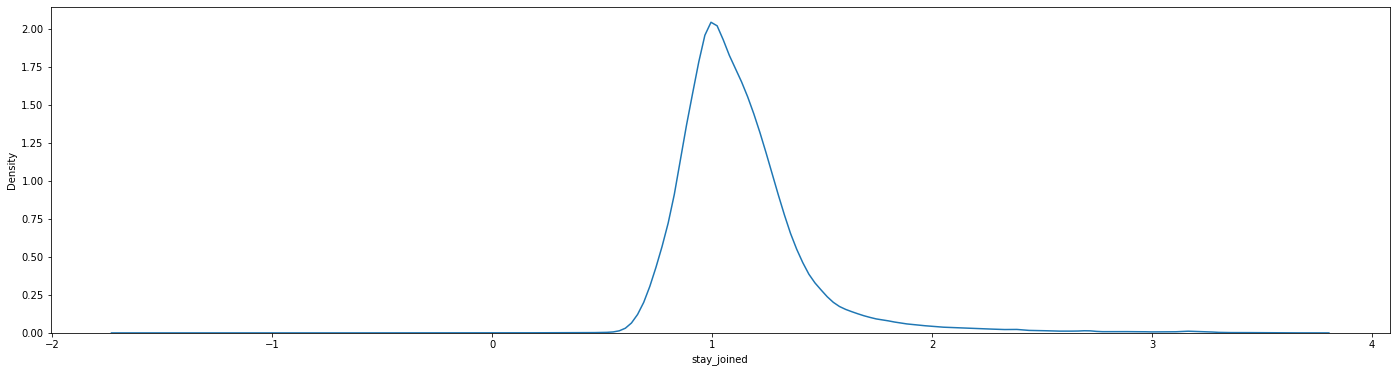

CPU times: user 1.86 s, sys: 133 ms, total: 2 s
Wall time: 1.88 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed['stay_joined']), hist = False)

plt.show()

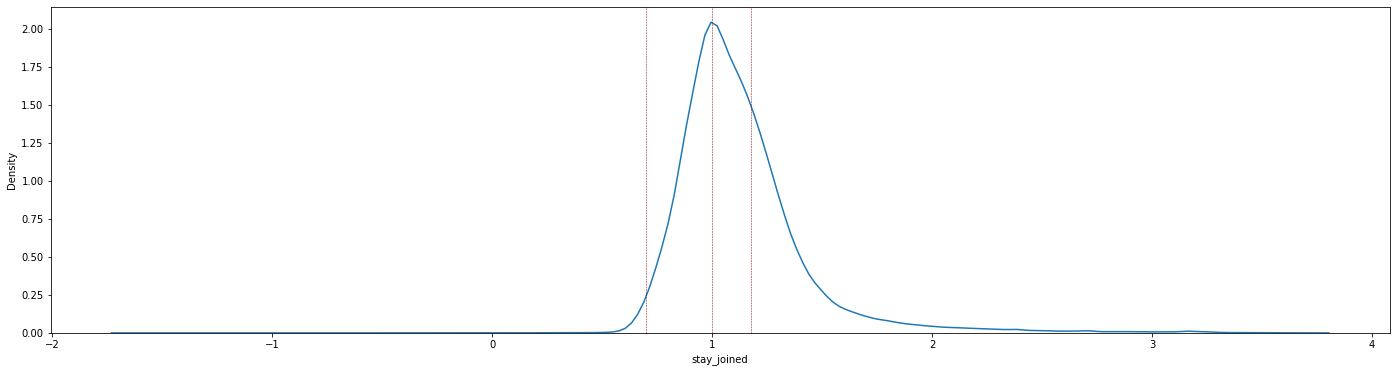

CPU times: user 1.79 s, sys: 229 ms, total: 2.02 s
Wall time: 1.77 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed['stay_joined']), hist = False)


plt.axvline(np.log10(5), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(10), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(15), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.show()

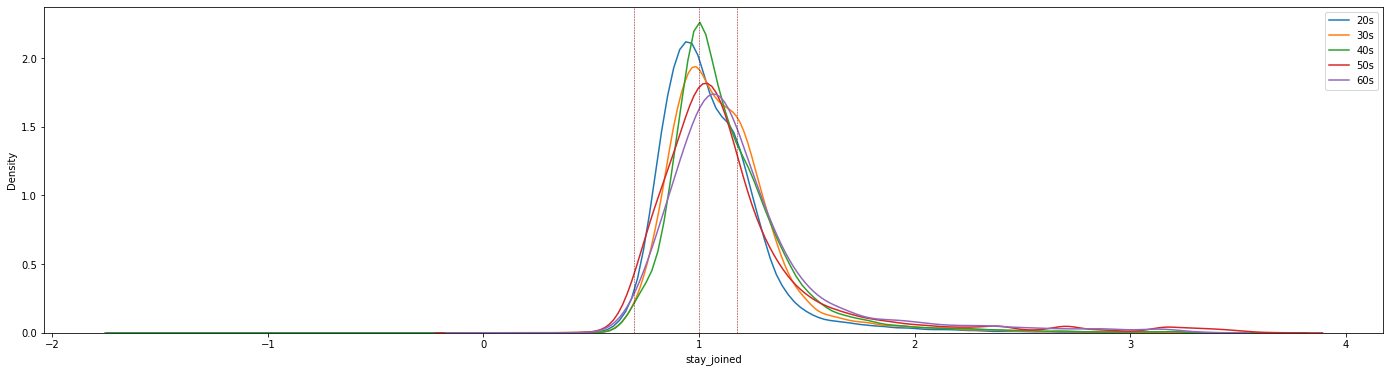

CPU times: user 1.89 s, sys: 546 ms, total: 2.44 s
Wall time: 1.84 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '20s']['stay_joined']), hist = False, label = '20s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '30s']['stay_joined']), hist = False, label = '30s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '40s']['stay_joined']), hist = False, label = '40s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '50s']['stay_joined']), hist = False, label = '50s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '60s']['stay_joined']), hist = False, label = '60s')


plt.axvline(np.log10(5), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(10), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(15), color = 'darkred', linestyle = '--', linewidth = 0.5)

plt.legend()
plt.show()

#### 가입화면 체류시간 trend

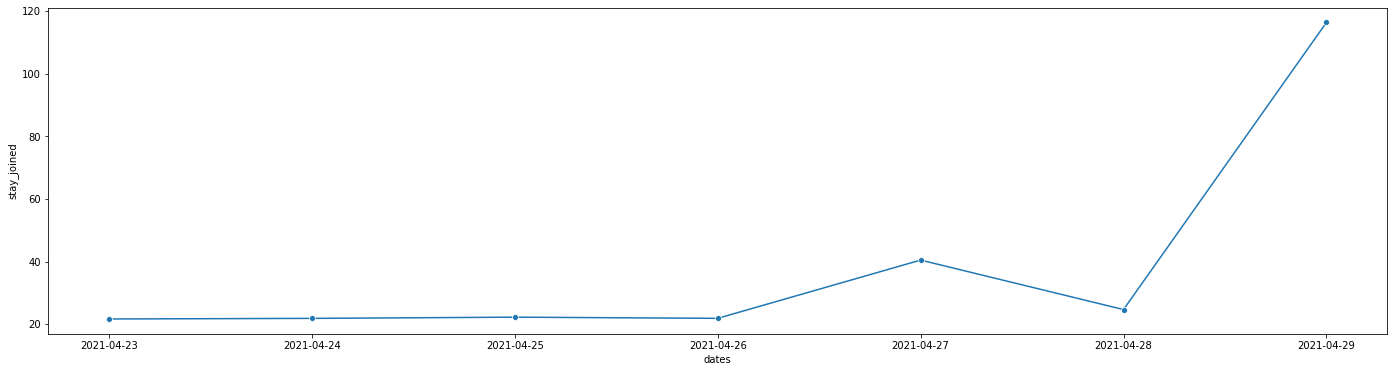

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.lineplot(
    data = df_stay_inflowed.groupby(['dates'])['stay_joined'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_joined',
    marker = 'o'
)

plt.show()

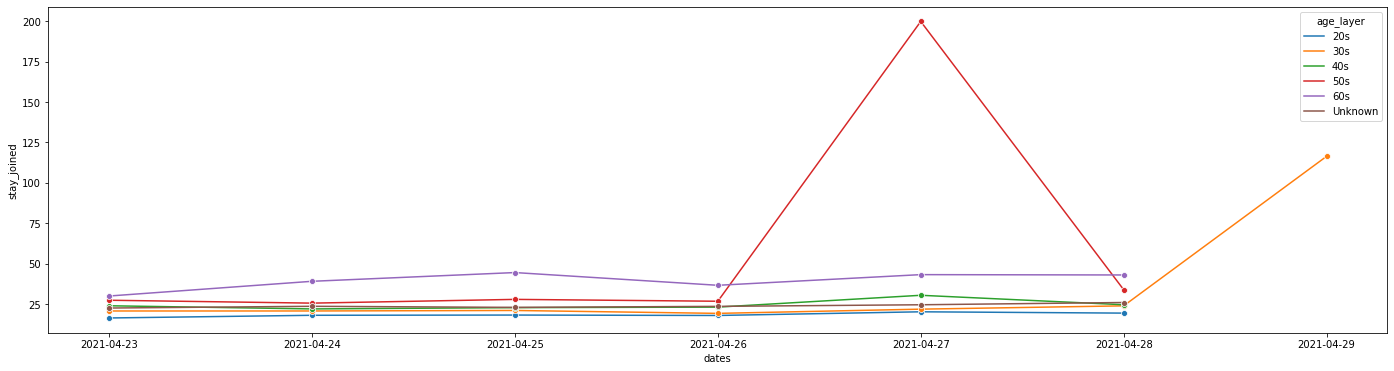

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.lineplot(
    data = df_stay_inflowed.groupby(['dates', 'age_layer'])['stay_joined'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_joined',
    hue = 'age_layer',
    marker = 'o'
)

plt.show()

### 4.3.3. 인증화면

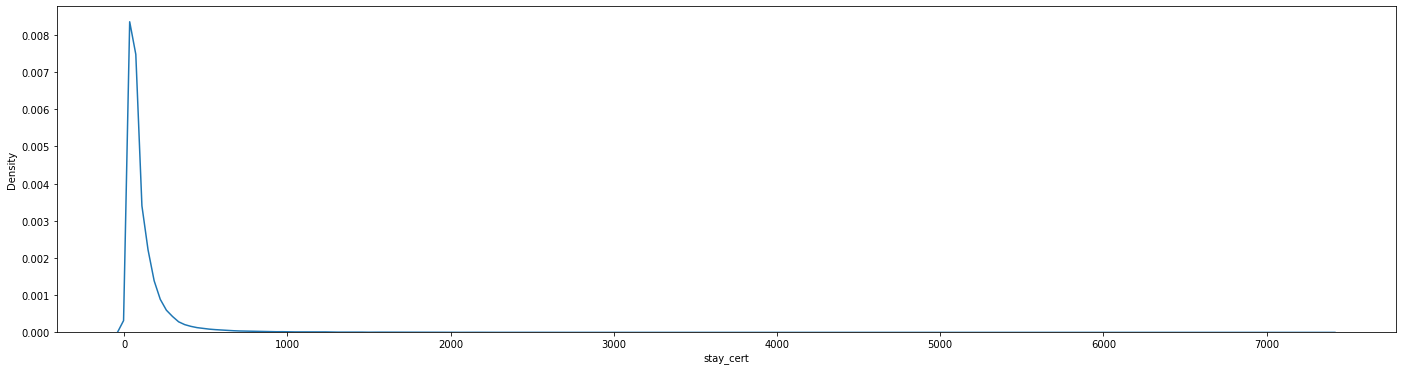

CPU times: user 1.06 s, sys: 129 ms, total: 1.19 s
Wall time: 1.07 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(df_stay_inflowed['stay_cert'], hist = False)

plt.show()

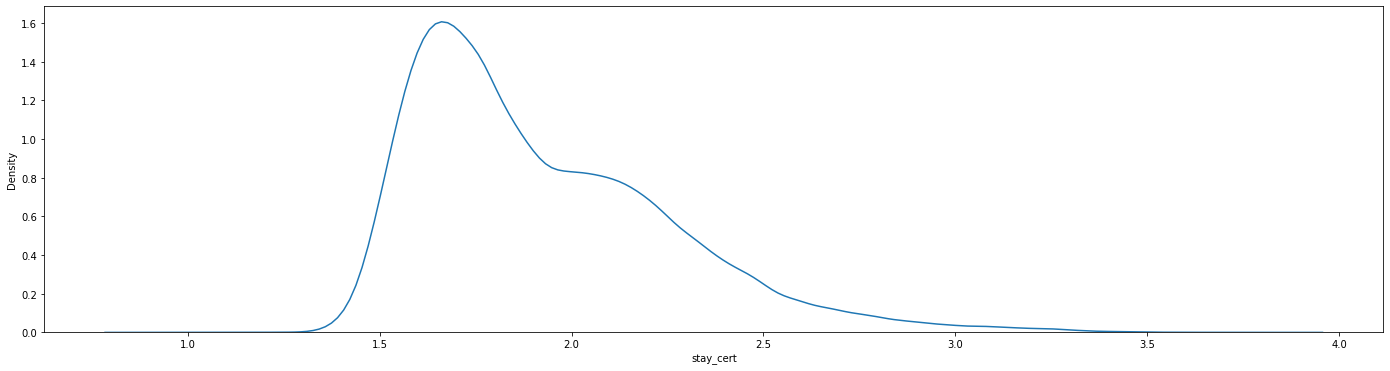

CPU times: user 1.22 s, sys: 133 ms, total: 1.36 s
Wall time: 1.23 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed['stay_cert']), hist = False)

plt.show()

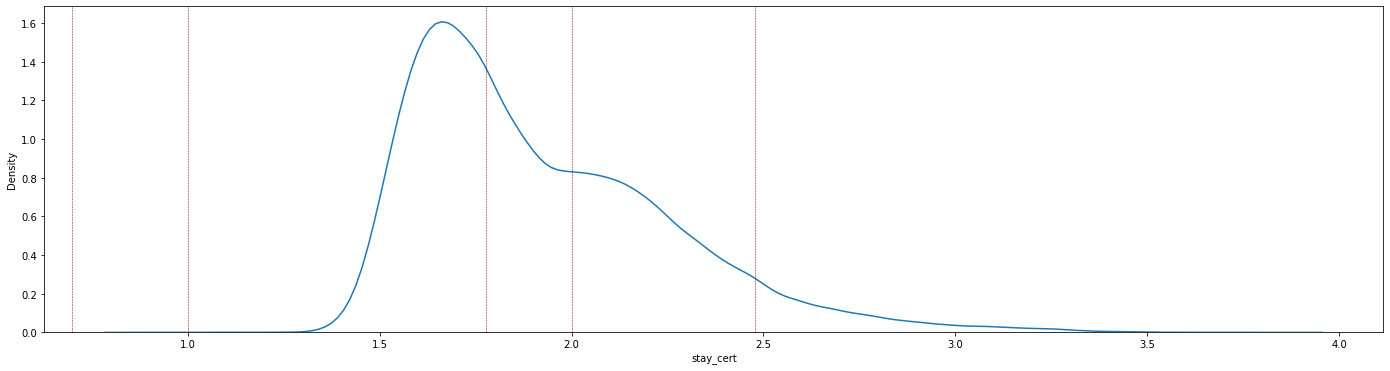

CPU times: user 1.27 s, sys: 202 ms, total: 1.47 s
Wall time: 1.27 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed['stay_cert']), hist = False)

plt.axvline(np.log10(5), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(10), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(60), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(100), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(300), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.show()

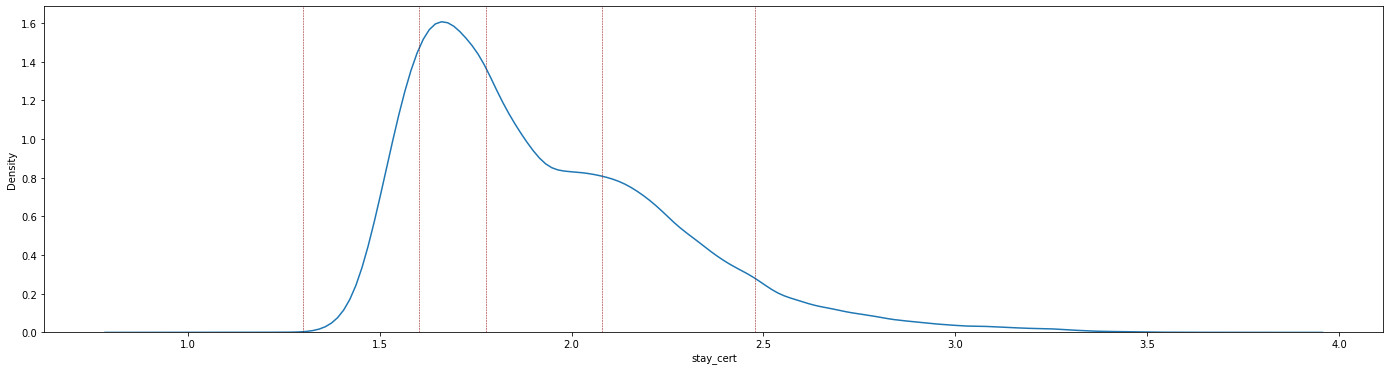

CPU times: user 1.29 s, sys: 223 ms, total: 1.51 s
Wall time: 1.27 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed['stay_cert']), hist = False)

plt.axvline(np.log10(20), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(40), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(60), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(120), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(300), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.show()

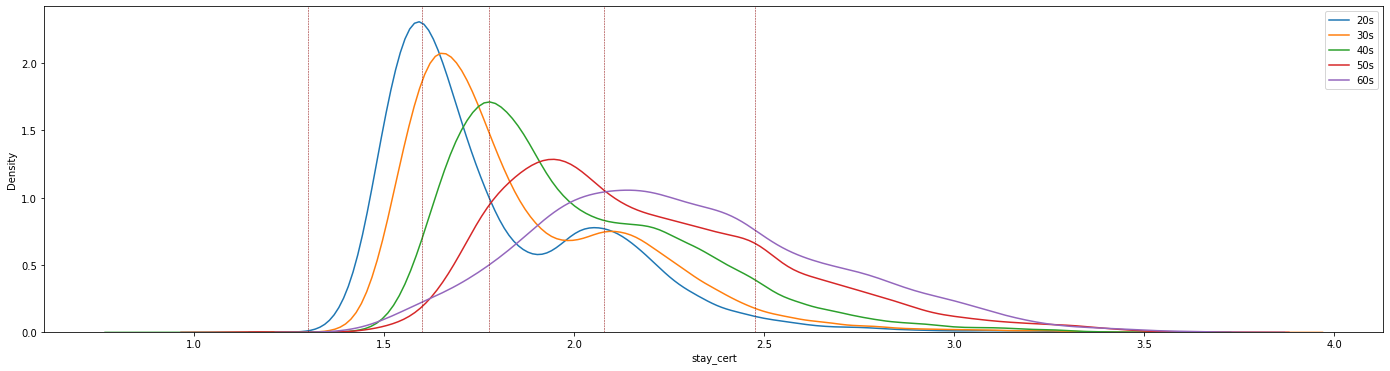

CPU times: user 1.78 s, sys: 526 ms, total: 2.31 s
Wall time: 1.75 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '20s']['stay_cert']), hist = False, label = '20s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '30s']['stay_cert']), hist = False, label = '30s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '40s']['stay_cert']), hist = False, label = '40s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '50s']['stay_cert']), hist = False, label = '50s')
sns.distplot(np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '60s']['stay_cert']), hist = False, label = '60s')

plt.axvline(np.log10(20), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(40), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(60), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(120), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(300), color = 'darkred', linestyle = '--', linewidth = 0.5)

plt.legend()
plt.show()

#### 인증화면 체류시간 trend

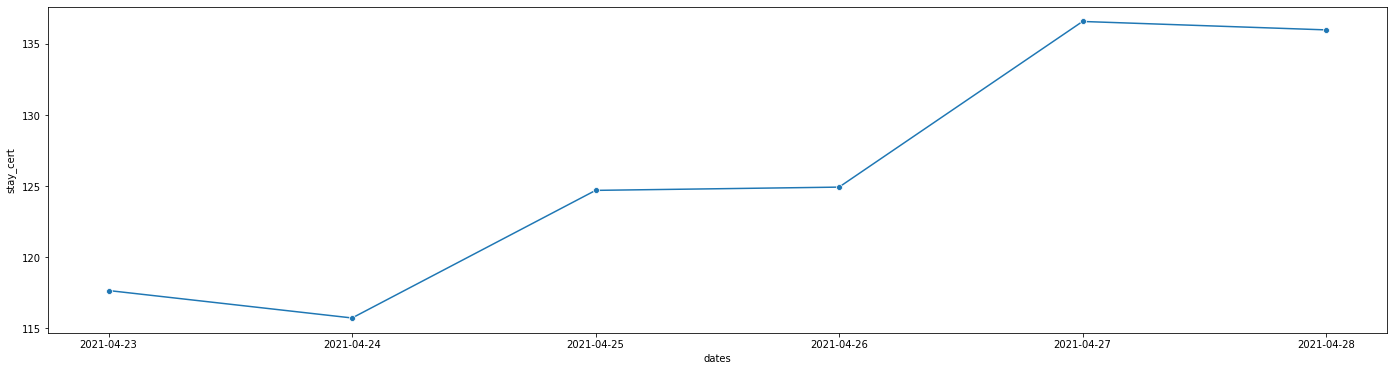

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.lineplot(
    data = df_stay_inflowed.groupby(['dates'])['stay_cert'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_cert',
    marker = 'o'
)

plt.show()

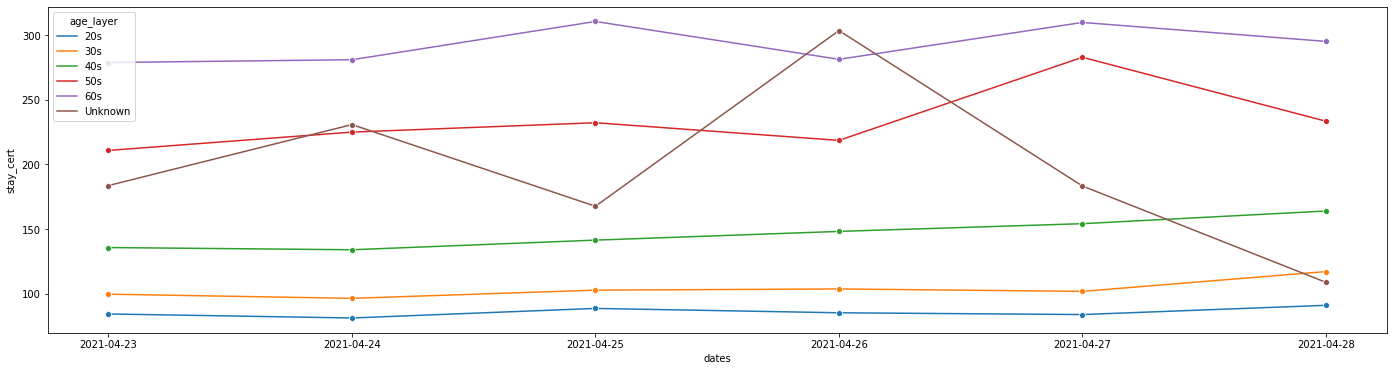

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.lineplot(
    data = df_stay_inflowed.groupby(['dates', 'age_layer'])['stay_cert'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_cert',
    hue = 'age_layer',
    marker = 'o'
)

plt.show()